*******************************************************************************************************
*******************************************************************************************************
# PROJECT 

**A comparison and application of machine learning techniques towards the analysis of UCI's heart disease dataset.**

In [1]:
# Python libraries for data pre-processing
import pandas as pd
import numpy as np

# Python libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
heart_df = pd.read_csv('heart.csv')

# Data Preprocessing

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_df.columns = ['Age','Sex','ChestPain','RestBP','Cholesterol','FastingBloodSugar',
                    'RestEcg','MaxHeartRate','ExerciseAngina','ST_Depression','Slope','MajorVesselsColored',
                    'Thalassemia','Goal']

In [5]:
heart_df.head(2)

,Age,Sex,ChestPain,RestBP,Cholesterol,FastingBloodSugar,RestEcg,MaxHeartRate,ExerciseAngina,ST_Depression,Slope,MajorVesselsColored,Thalassemia,Goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  303 non-null    int64  
 1   Sex                  303 non-null    int64  
 2   ChestPain            303 non-null    int64  
 3   RestBP               303 non-null    int64  
 4   Cholesterol          303 non-null    int64  
 5   FastingBloodSugar    303 non-null    int64  
 6   RestEcg              303 non-null    int64  
 7   MaxHeartRate         303 non-null    int64  
 8   ExerciseAngina       303 non-null    int64  
 9   ST_Depression        303 non-null    float64
 10  Slope                303 non-null    int64  
 11  MajorVesselsColored  303 non-null    int64  
 12  Thalassemia          303 non-null    int64  
 13  Goal                 303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for Missing Values MV: 
heart_df.isnull().sum()

Age                    0
Sex                    0
ChestPain              0
RestBP                 0
Cholesterol            0
FastingBloodSugar      0
RestEcg                0
MaxHeartRate           0
ExerciseAngina         0
ST_Depression          0
Slope                  0
MajorVesselsColored    0
Thalassemia            0
Goal                   0
dtype: int64

In [8]:
# Checking for duplicated rows
duplicates = heart_df[heart_df.duplicated()]
print("Number of duplicate rows :: ", duplicates.shape)

Number of duplicate rows ::  (1, 14)


In [9]:
# Droping the duplicated row and printing number of duplicate rows after a recheck
heart_df = heart_df.drop_duplicates()
print("Number of duplicate rows :: ", heart_df[heart_df.duplicated()].shape)

Number of duplicate rows ::  (0, 14)


In [10]:
heart_df.shape

(302, 14)

In [11]:
#Store proceeding dataframe as heart_ML for use during application of ML techniques
heart_df.to_csv('heart_ML.csv', index=False)

# Exploratory Data Analysis (EDA)

In [12]:
# Converting categorical attributes to text for better data exploratory and visualization

heart_df['Sex'][heart_df['Sex'] == 0] = 'Female'
heart_df['Sex'][heart_df['Sex'] == 1] = 'Male'

heart_df['Goal'][heart_df['Goal'] == 0] = 'No Disease'
heart_df['Goal'][heart_df['Goal'] == 1] = 'Has Disease'

heart_df['ChestPain'][heart_df['ChestPain'] == 0] = 'Typical Angina'
heart_df['ChestPain'][heart_df['ChestPain'] == 1] = 'Atypical Angina'
heart_df['ChestPain'][heart_df['ChestPain'] == 2] = 'Non-Anginal Pain'
heart_df['ChestPain'][heart_df['ChestPain'] == 3] = 'Asymptomatic'

heart_df['FastingBloodSugar'][heart_df['FastingBloodSugar'] == 0] = 'Less Than 120mg/dl'
heart_df['FastingBloodSugar'][heart_df['FastingBloodSugar'] == 1] = 'Greater Than 120mg/dl'

heart_df['RestEcg'][heart_df['RestEcg'] == 0] = 'Normal'
heart_df['RestEcg'][heart_df['RestEcg'] == 1] = 'ST-T Wave Abnormality'
heart_df['RestEcg'][heart_df['RestEcg'] == 2] = 'Left Ventricular Hypertrophy'

heart_df['ExerciseAngina'][heart_df['ExerciseAngina'] == 1] = 'Yes'
heart_df['ExerciseAngina'][heart_df['ExerciseAngina'] == 0] = 'No'

heart_df['Slope'][heart_df['Slope'] == 0] = 'Upsloping'
heart_df['Slope'][heart_df['Slope'] == 1] = 'Flat'
heart_df['Slope'][heart_df['Slope'] == 2] = 'Downsloping'

heart_df['Thalassemia'][heart_df['Thalassemia'] == 1] = 'Normal'
heart_df['Thalassemia'][heart_df['Thalassemia'] == 2] = 'Fixed Defect'
heart_df['Thalassemia'][heart_df['Thalassemia'] == 3] = 'Reversable Defect'

heart_df['MajorVesselsColored'][heart_df['MajorVesselsColored'] == 0] = 'None'
heart_df['MajorVesselsColored'][heart_df['MajorVesselsColored'] == 1] = 'One Major Vessel'
heart_df['MajorVesselsColored'][heart_df['MajorVesselsColored'] == 2] = 'Two Major Vessel'
heart_df['MajorVesselsColored'][heart_df['MajorVesselsColored'] == 3] = 'Three Major Vessel'
heart_df['MajorVesselsColored'][heart_df['MajorVesselsColored'] == 4] = 'Other'


In [13]:
heart_df['Sex'].value_counts()

Male      206
Female     96
Name: Sex, dtype: int64

In [14]:
heart_df['Goal'].value_counts()

Has Disease    164
No Disease     138
Name: Goal, dtype: int64

In [15]:
heart_df['ChestPain'].value_counts()

Typical Angina      143
Non-Anginal Pain     86
Atypical Angina      50
Asymptomatic         23
Name: ChestPain, dtype: int64

In [16]:
heart_df['FastingBloodSugar'].value_counts()

Less Than 120mg/dl       257
Greater Than 120mg/dl     45
Name: FastingBloodSugar, dtype: int64

In [17]:
heart_df['RestEcg'].value_counts()

ST-T Wave Abnormality           151
Normal                          147
Left Ventricular Hypertrophy      4
Name: RestEcg, dtype: int64

In [18]:
heart_df['ExerciseAngina'].value_counts()

No     203
Yes     99
Name: ExerciseAngina, dtype: int64

In [19]:
heart_df['Slope'].value_counts()

Downsloping    141
Flat           140
Upsloping       21
Name: Slope, dtype: int64

In [20]:
heart_df['Thalassemia'].value_counts()

Fixed Defect         165
Reversable Defect    117
Normal                18
0                      2
Name: Thalassemia, dtype: int64

In [21]:
# Dropping rows where 'Thalassemia' = 0, and rechecking the distribution
heart_df.drop(heart_df[heart_df.Thalassemia ==0].index, inplace=True)

heart_df['Thalassemia'].value_counts()

Fixed Defect         165
Reversable Defect    117
Normal                18
Name: Thalassemia, dtype: int64

In [22]:
heart_df['MajorVesselsColored'].value_counts()

None                  173
One Major Vessel       65
Two Major Vessel       38
Three Major Vessel     20
Other                   4
Name: MajorVesselsColored, dtype: int64

In [23]:
# Data.head visualization of modification to categorical attributes
heart_df.head()

,Age,Sex,ChestPain,RestBP,Cholesterol,FastingBloodSugar,RestEcg,MaxHeartRate,ExerciseAngina,ST_Depression,Slope,MajorVesselsColored,Thalassemia,Goal
0,63,Male,Asymptomatic,145,233,Greater Than 120mg/dl,Normal,150,No,2.3,Upsloping,None,Normal,Has Disease
1,37,Male,Non-Anginal Pain,130,250,Less Than 120mg/dl,ST-T Wave Abnormality,187,No,3.5,Upsloping,None,Fixed Defect,Has Disease
2,41,Female,Atypical Angina,130,204,Less Than 120mg/dl,Normal,172,No,1.4,Downsloping,None,Fixed Defect,Has Disease
3,56,Male,Atypical Angina,120,236,Less Than 120mg/dl,ST-T Wave Abnormality,178,No,0.8,Downsloping,None,Fixed Defect,Has Disease
4,57,Female,Typical Angina,120,354,Less Than 120mg/dl,ST-T Wave Abnormality,163,Yes,0.6,Downsloping,None,Fixed Defect,Has Disease


In [24]:
heart_df.shape

(300, 14)

**Distribution of Heart Disease ('Goal' Attribute)**

In [25]:
heart_df.groupby('Goal').size()

Goal
Has Disease    163
No Disease     137
dtype: int64

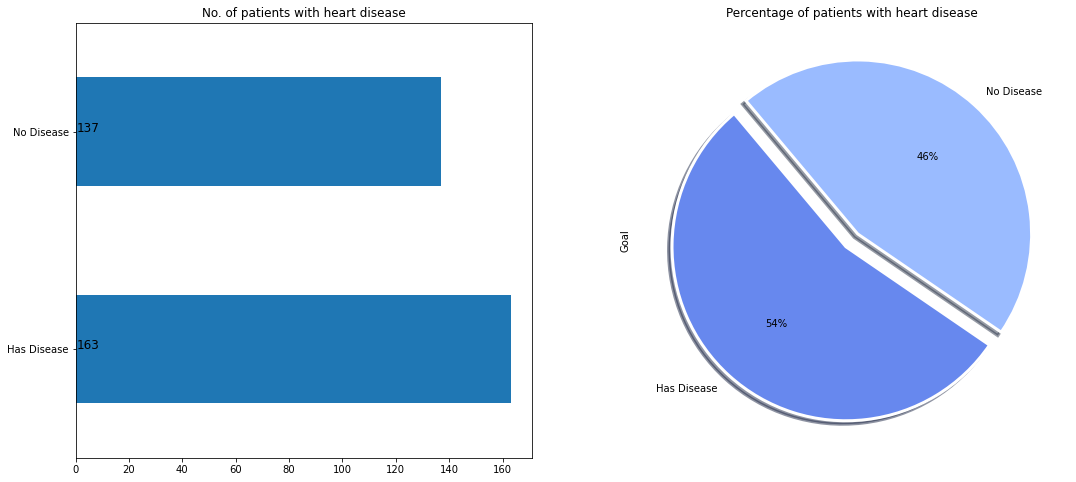

In [26]:
# plotting the distribution of 'Goal' attribute along those with and without heart diseases
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(18,8))

ax1 = heart_df["Goal"].value_counts().plot(kind="barh", ax =ax1)
for i,j in enumerate(heart_df["Goal"].value_counts().values):
    ax1.text(.5,i,j,fontsize=12)
ax1.set(title = 'No. of patients with heart disease')


ax2 = heart_df['Goal'].value_counts().plot.pie(colors = sns.color_palette("coolwarm"), 
                   autopct = "%1.0f%%", startangle = 130, wedgeprops={"linewidth":3,"edgecolor":"w"},
                                               explode=[.1/2,.1/2], shadow=True);
ax2.set(title = 'Percentage of patients with heart disease')

plt.show()

# Analysis of Numerical Attributes

In [27]:
#A discription of numberical attributes
heart_df.describe()

,Age,RestBP,Cholesterol,MaxHeartRate,ST_Depression
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.433333,131.626667,246.743333,149.663333,1.046667
std,9.076720,17.619557,51.837514,22.889658,1.163760
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.750000,120.000000,211.000000,133.750000,0.000000
50%,56.000000,130.000000,241.500000,152.500000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


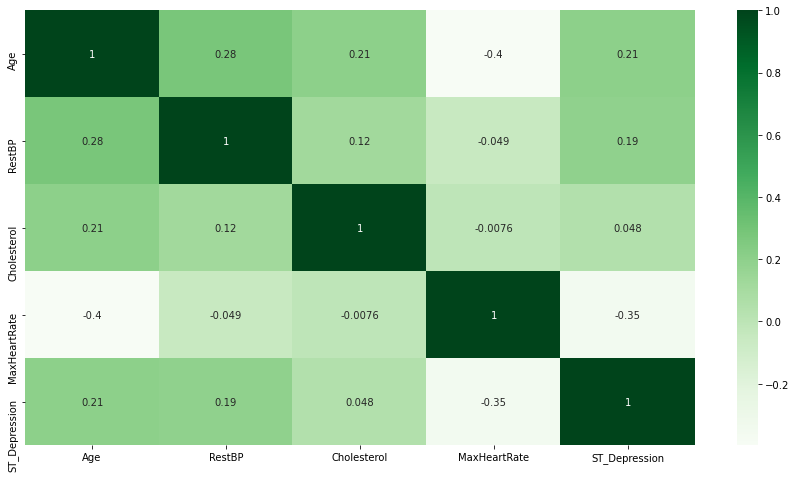

In [28]:
# A correletional heatmap of numberical attributes
plt.figure(figsize=(15,8))
sns.heatmap(heart_df.corr(), annot=True, cmap='Greens', )
plt.show()

In [29]:
# Grouping patients with and without heart diseases into two dinstinct dataframe for use in visualization below
Goal1=heart_df[heart_df['Goal']=='Has Disease']
Goal0=heart_df[heart_df['Goal']=='No Disease']

**Review of Age Distribution**

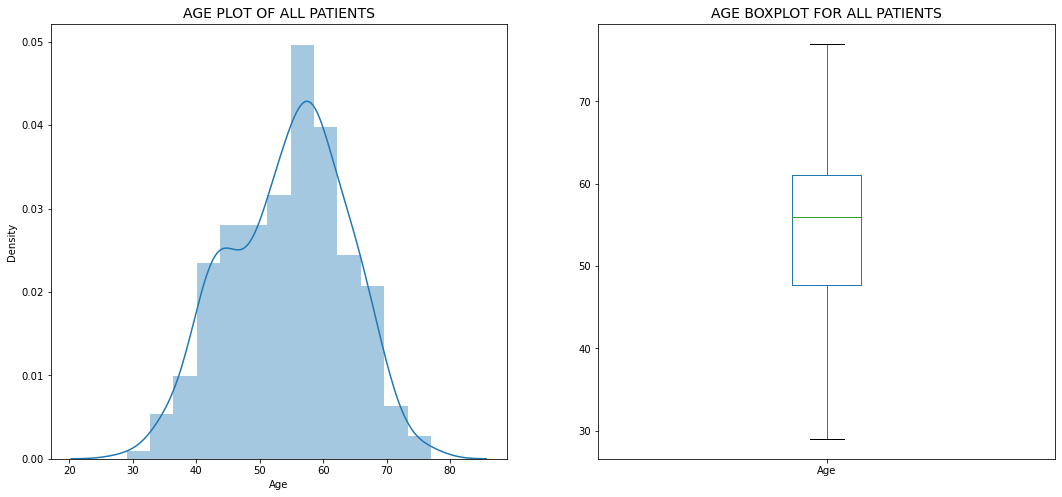

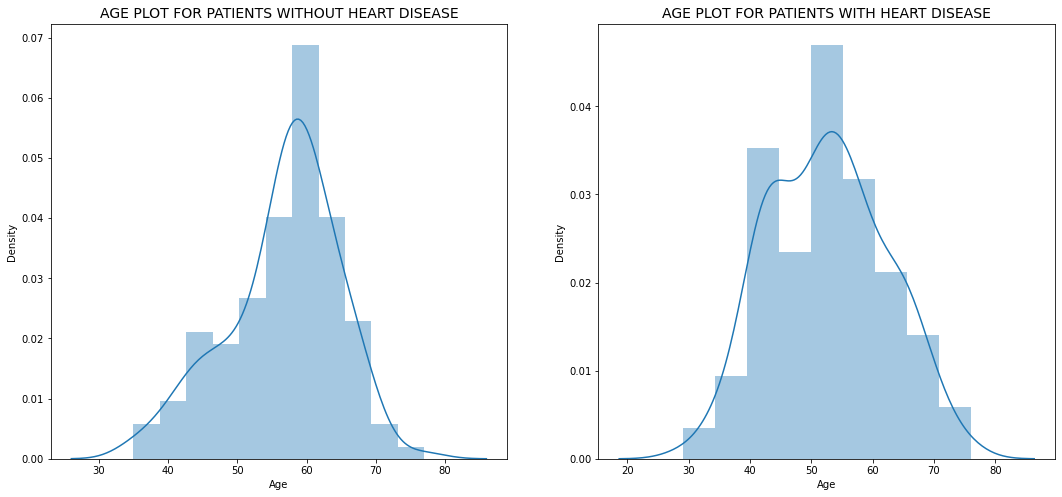

In [30]:
# plotting 'Age' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(heart_df['Age'])
plt.title('AGE PLOT OF ALL PATIENTS', weight='light', fontsize=14)

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df['Age'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('AGE BOXPLOT FOR ALL PATIENTS', weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Goal0['Age'])
plt.title('AGE PLOT FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Goal1['Age'])
plt.title('AGE PLOT FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

**Review of RestBP Distribution**

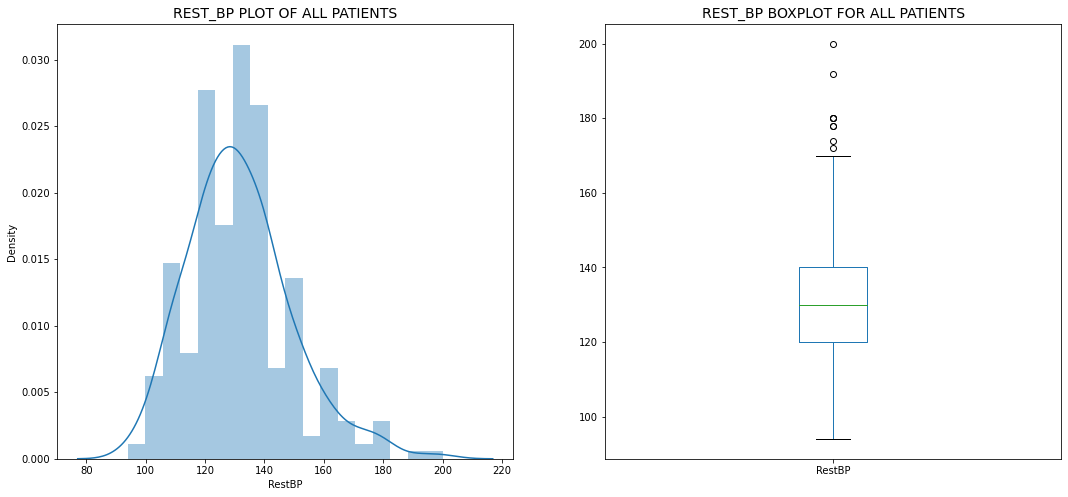

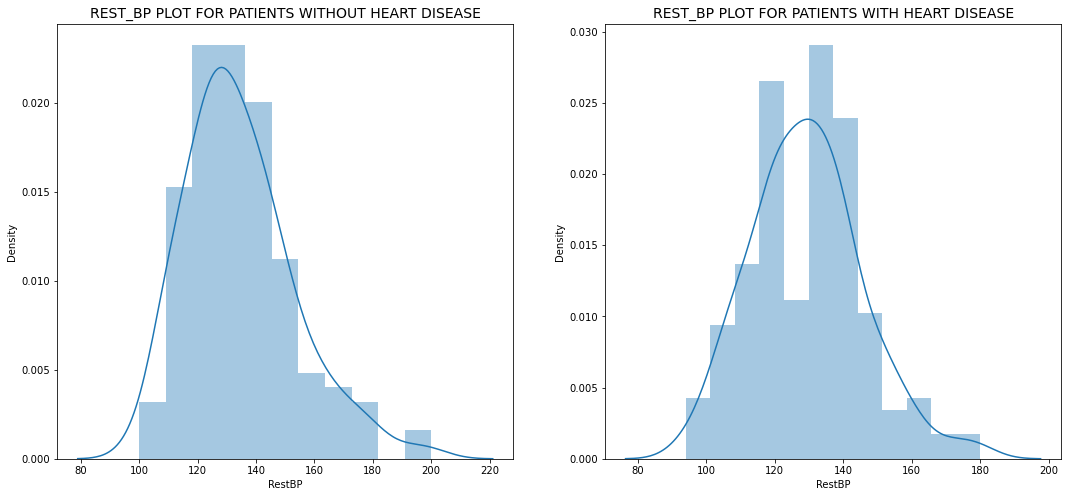

In [31]:
# plotting 'RestBP' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(heart_df['RestBP'])
plt.title('REST_BP PLOT OF ALL PATIENTS', weight='light', fontsize=14)

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df['RestBP'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('REST_BP BOXPLOT FOR ALL PATIENTS', weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Goal0['RestBP'])
plt.title('REST_BP PLOT FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Goal1['RestBP'])
plt.title('REST_BP PLOT FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

**Review of Cholesterol Distribution**

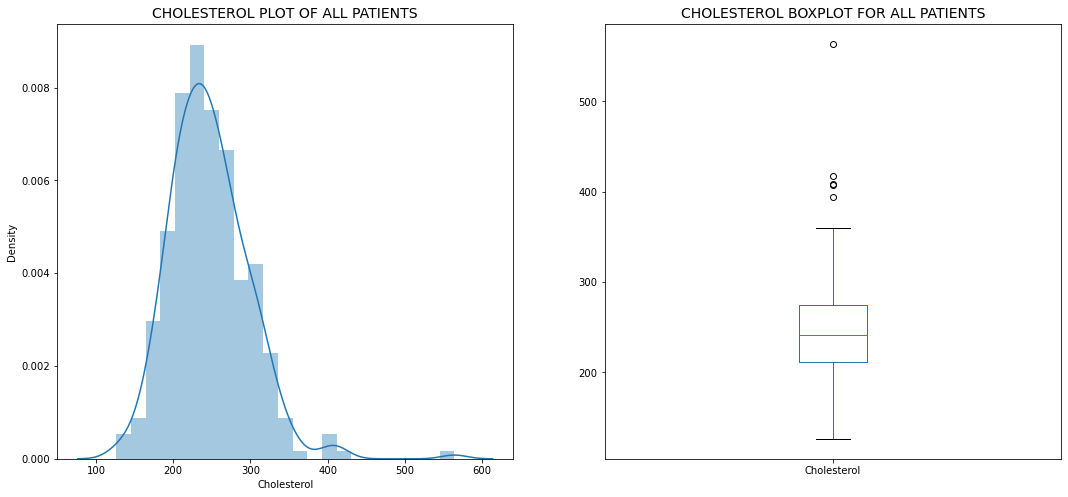

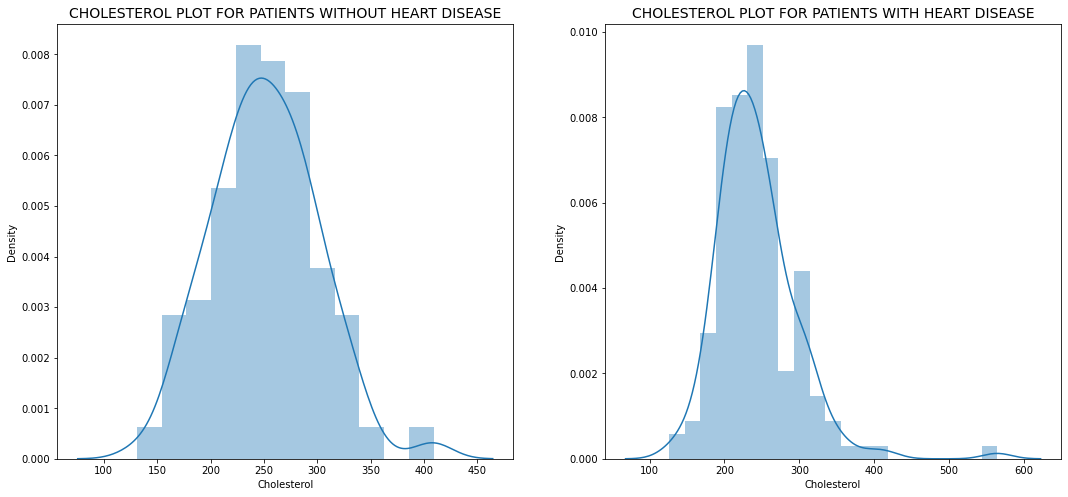

In [32]:
# plotting 'Cholesterol' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(heart_df['Cholesterol'])
plt.title('CHOLESTEROL PLOT OF ALL PATIENTS', weight='light', fontsize=14)

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df['Cholesterol'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('CHOLESTEROL BOXPLOT FOR ALL PATIENTS', weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Goal0['Cholesterol'])
plt.title('CHOLESTEROL PLOT FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Goal1['Cholesterol'])
plt.title('CHOLESTEROL PLOT FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

**Review of MaxHeartRate Distribution**

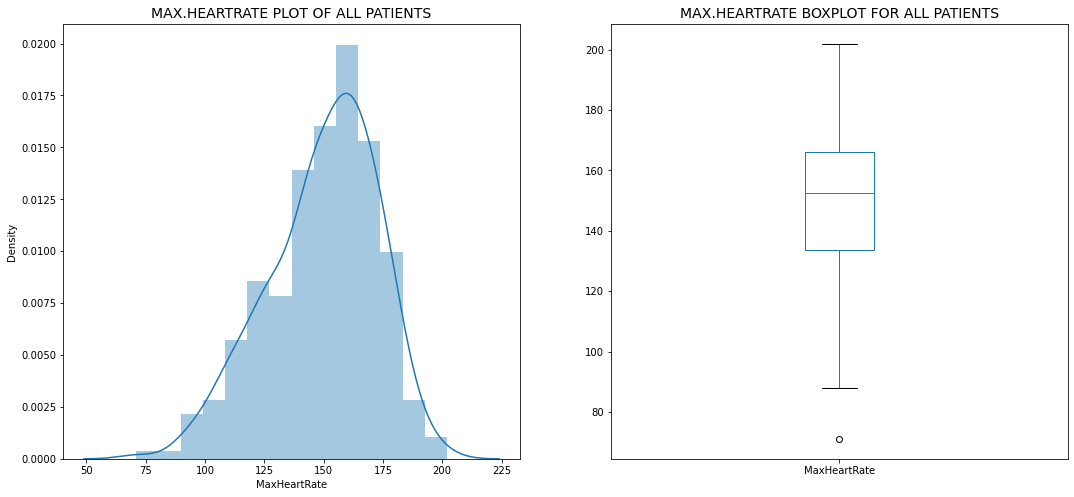

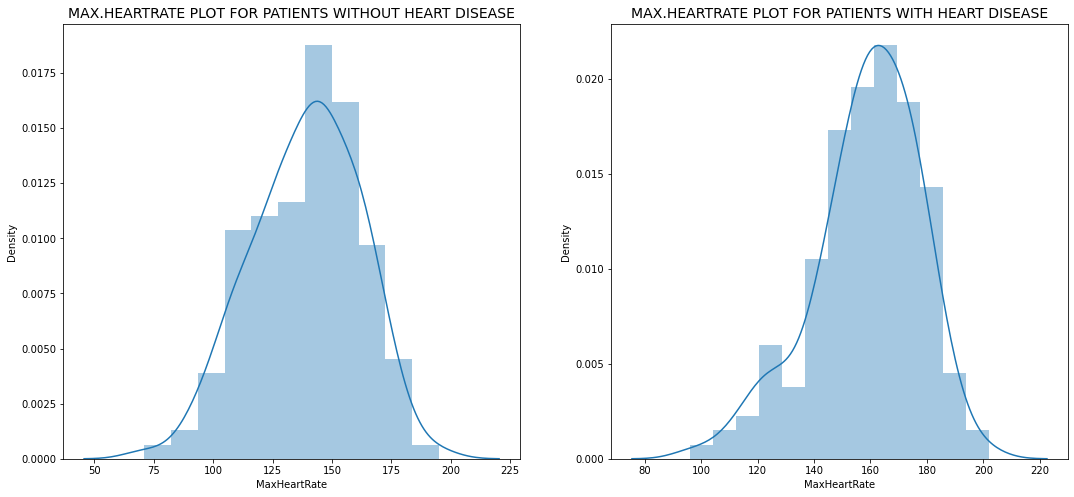

In [33]:
# plotting 'MaxHeartRate' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(heart_df['MaxHeartRate'])
plt.title('MAX.HEARTRATE PLOT OF ALL PATIENTS', weight='light', fontsize=14)

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df['MaxHeartRate'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('MAX.HEARTRATE BOXPLOT FOR ALL PATIENTS', weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Goal0['MaxHeartRate'])
plt.title('MAX.HEARTRATE PLOT FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Goal1['MaxHeartRate'])
plt.title('MAX.HEARTRATE PLOT FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

**Review of ST_Depression Distribution**

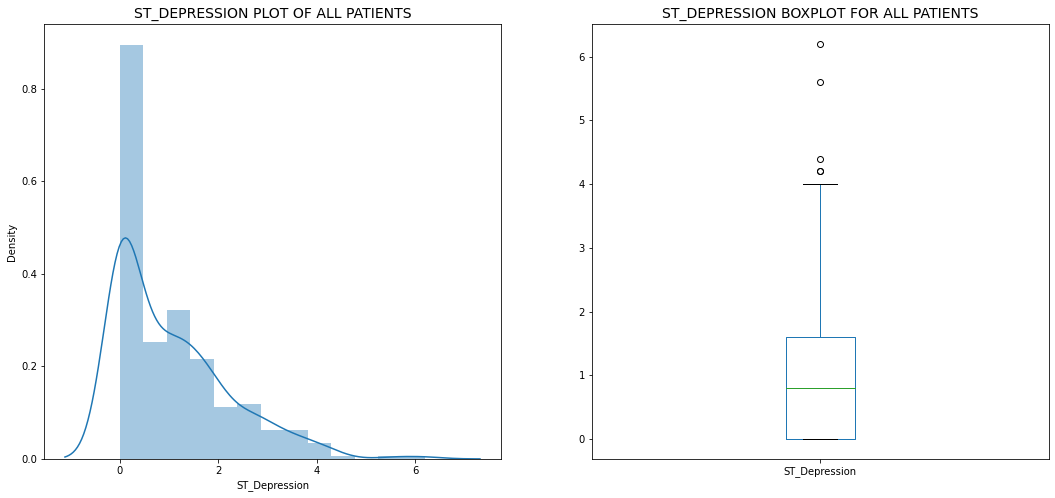

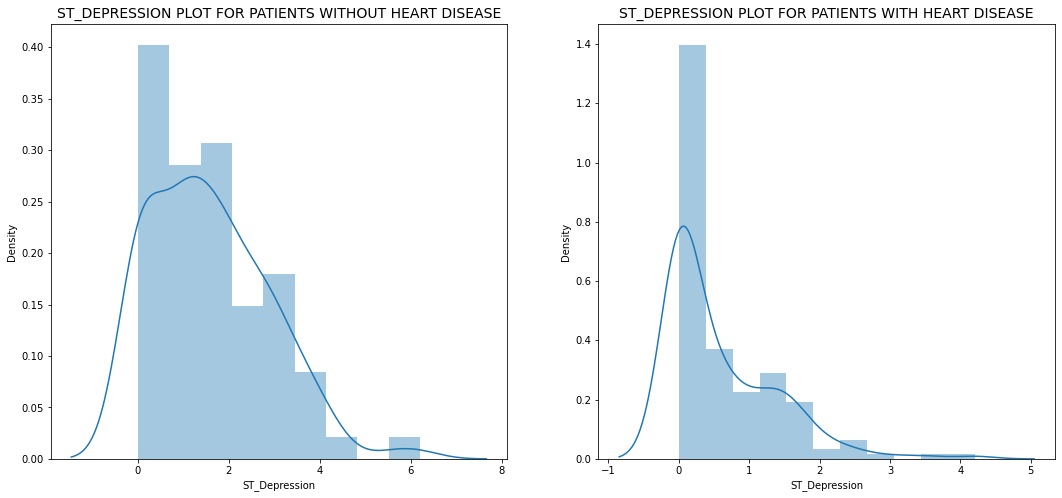

In [34]:
# plotting 'ST_Depression' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(heart_df['ST_Depression'])
plt.title('ST_DEPRESSION PLOT OF ALL PATIENTS', weight='light', fontsize=14)

# plotting boxplot for entire distribution
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df['ST_Depression'].plot(kind='box', subplots=True, layout=(5,3))
plt.title('ST_DEPRESSION BOXPLOT FOR ALL PATIENTS', weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Goal0['ST_Depression'])
plt.title('ST_DEPRESSION PLOT FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Goal1['ST_Depression'])
plt.title('ST_DEPRESSION PLOT FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

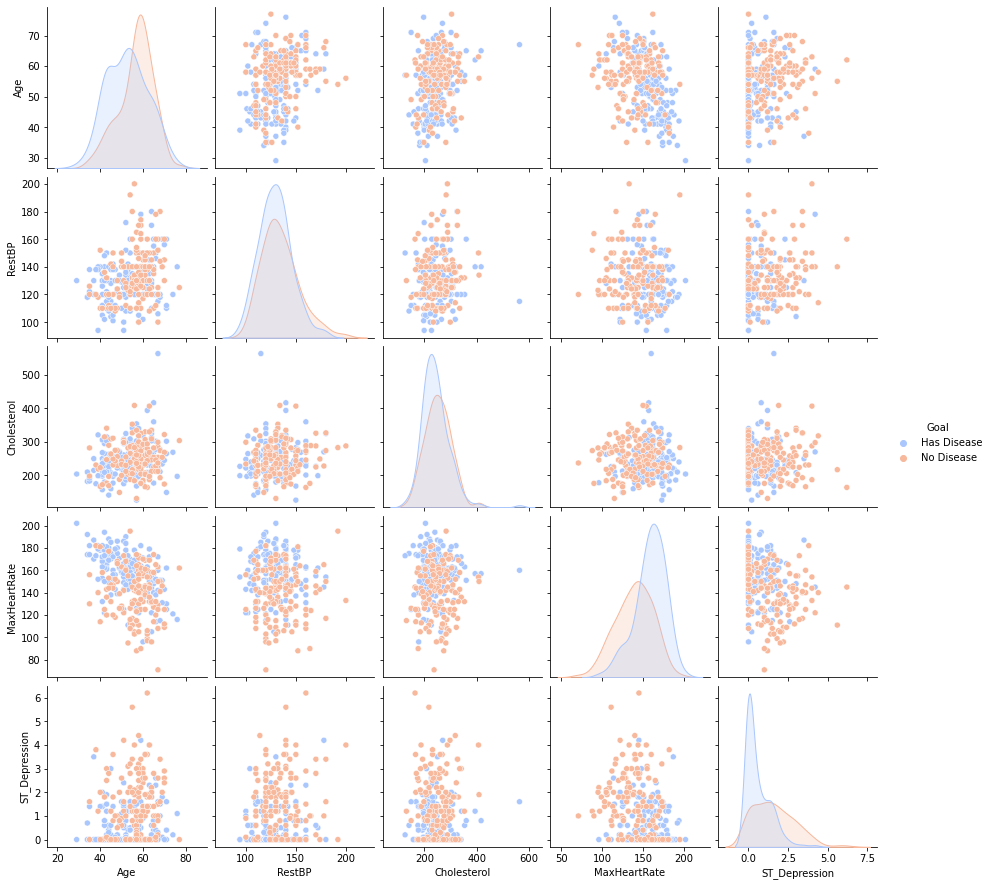

In [35]:
sns.pairplot(heart_df, hue = 'Goal', palette='coolwarm', vars = ['Age', 'RestBP', 'Cholesterol', 'MaxHeartRate', 
                                                                 'ST_Depression'])
plt.show()

# Analysis of Categorical Attributes

In [36]:
# summary statistics of categorical attributes
heart_df.describe(include =[np.object])

,Sex,ChestPain,FastingBloodSugar,RestEcg,ExerciseAngina,Slope,MajorVesselsColored,Thalassemia,Goal
count,300,300,300,300,300,300,300,300,300
unique,2,4,2,3,2,3,5,3,2
top,Male,Typical Angina,Less Than 120mg/dl,ST-T Wave Abnormality,No,Downsloping,None,Fixed Defect,Has Disease
freq,205,142,256,150,202,140,173,165,163


**Review of Sex Distribution**

In [37]:
heart_df.groupby('Sex').size()

Sex
Female     95
Male      205
dtype: int64

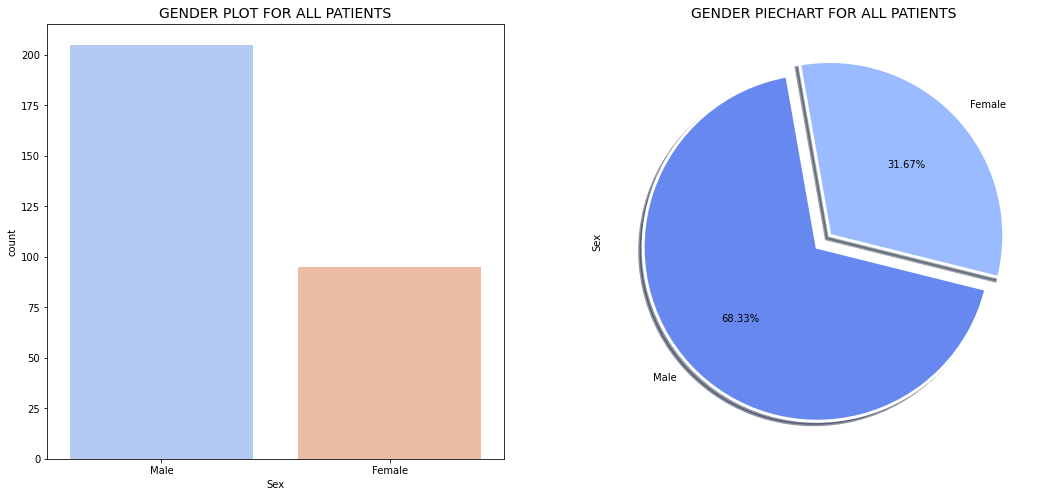

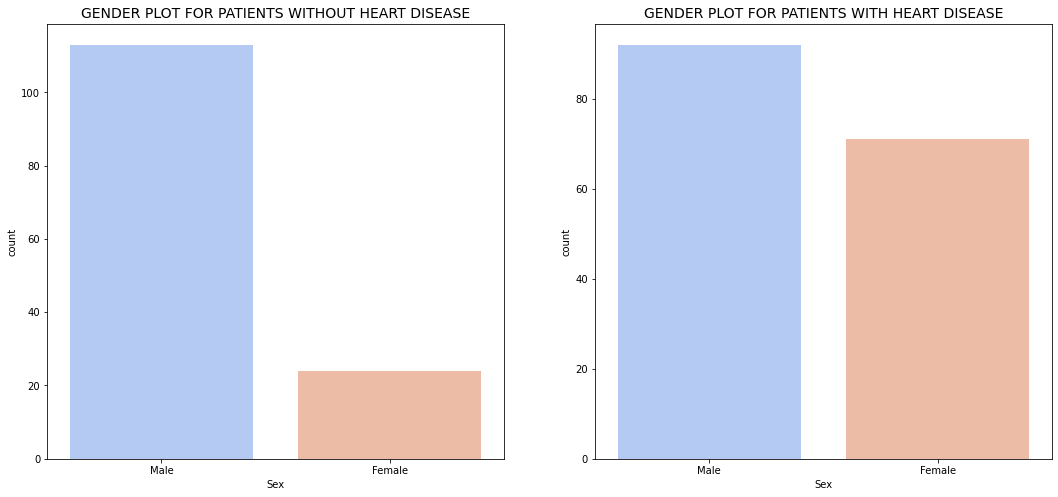

In [38]:
# plotting 'Sex' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['Sex'], palette='coolwarm')
plt.title('GENDER PLOT FOR ALL PATIENTS', weight='light', fontsize=14)

ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["Sex"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm"),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.1/2,.1/2], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['Sex'], palette='coolwarm')
plt.title('GENDER PLOT FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['Sex'], palette='coolwarm')
plt.title('GENDER PLOT FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)
plt.show()

In [39]:
# Distribution of patients based on Sex
plot_criteria= ['Sex', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
Sex,,
Female,43.560000,17.520000
Male,56.440000,82.480000


**Distribution of Chest Pain Type**

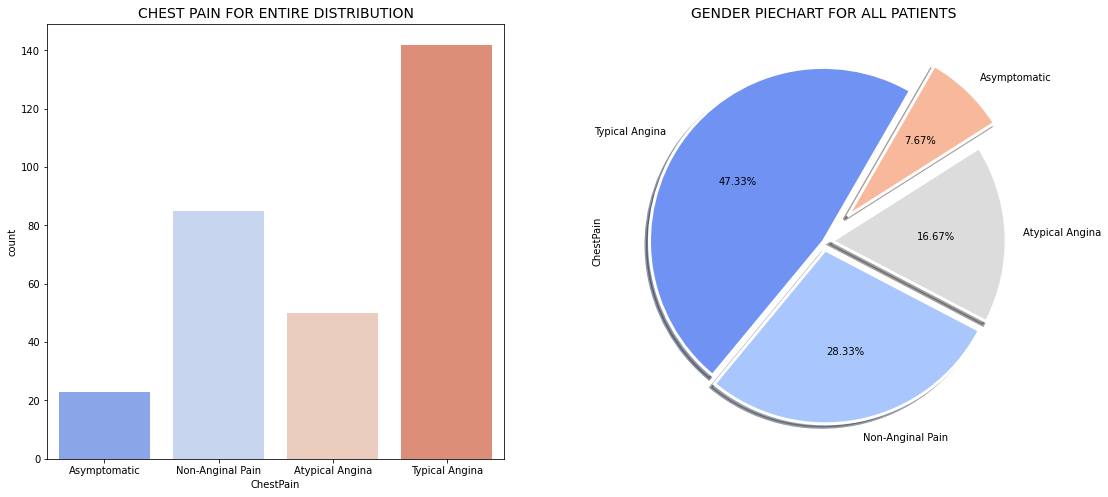

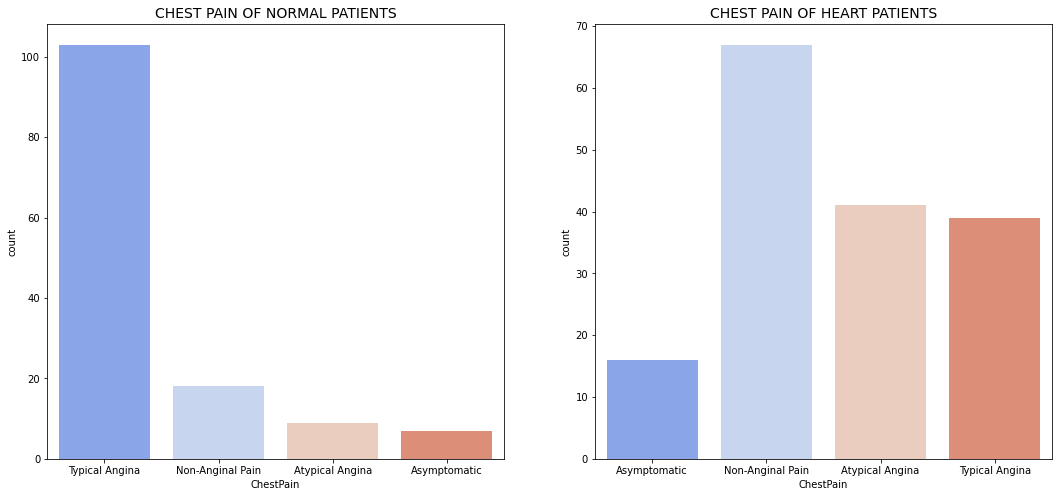

In [40]:
# plotting 'ChestPain' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['ChestPain'], palette='coolwarm')
plt.title('CHEST PAIN FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["ChestPain"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm",5),startangle = 60,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2,.1/2,.2], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['ChestPain'], palette='coolwarm')
plt.title('CHEST PAIN OF NORMAL PATIENTS', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['ChestPain'], palette='coolwarm')
plt.title('CHEST PAIN OF HEART PATIENTS', weight='light', fontsize=14)
plt.show()

In [41]:
# Distribution of patients based on Chest Pain Type
plot_criteria= ['ChestPain', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
ChestPain,,
Asymptomatic,9.820000,5.110000
Atypical Angina,25.150000,6.570000
Non-Anginal Pain,41.100000,13.140000
Typical Angina,23.930000,75.180000


**Distribution of Fast Blood Sugar**

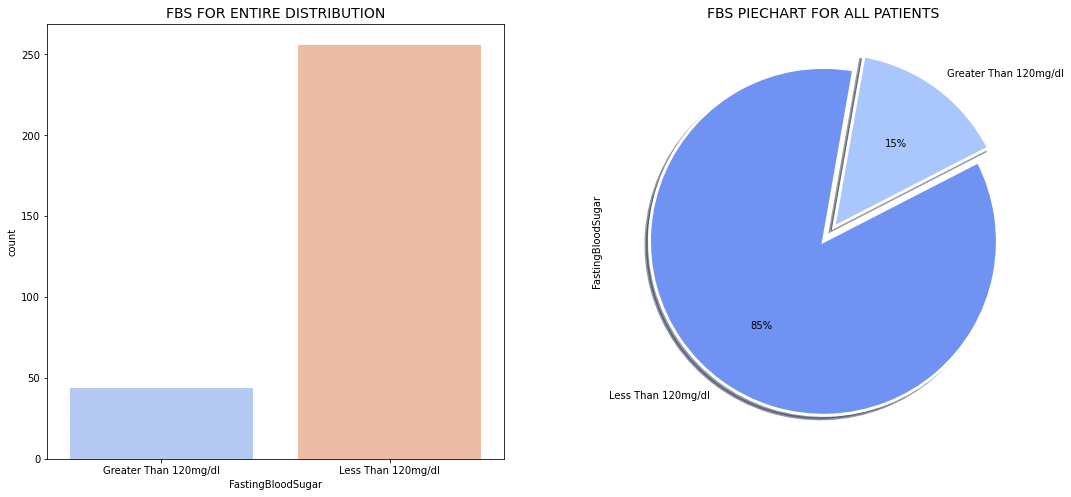

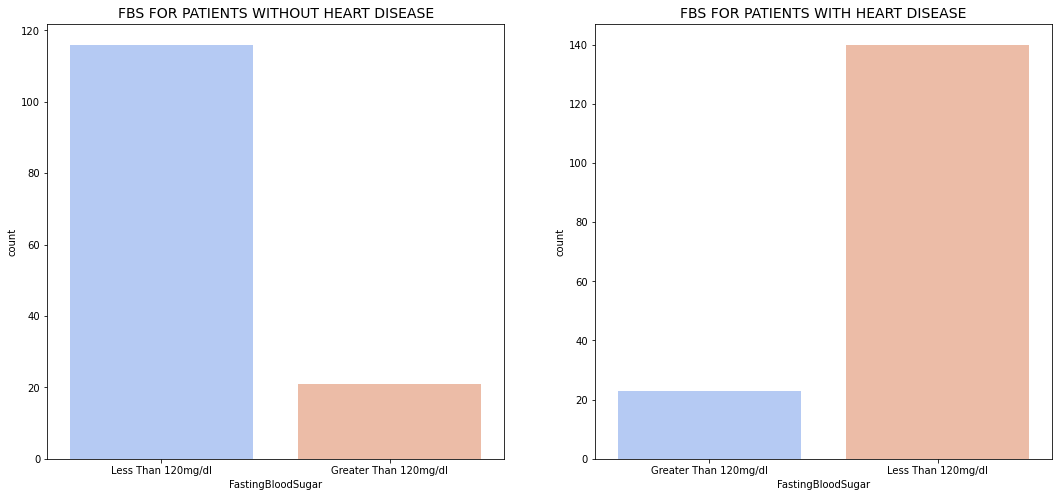

In [42]:
# plotting 'FastingBloodSugar' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['FastingBloodSugar'], palette='coolwarm')
plt.title('FBS FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["FastingBloodSugar"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("coolwarm",5),startangle = 80,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1], shadow=True)
plt.title("FBS PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['FastingBloodSugar'], palette='coolwarm')
plt.title('FBS FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['FastingBloodSugar'], palette='coolwarm')
plt.title('FBS FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)
plt.show()

In [43]:
# Distribution of patients based on FastingBloodSugar
plot_criteria= ['FastingBloodSugar', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
FastingBloodSugar,,
Greater Than 120mg/dl,14.110000,15.330000
Less Than 120mg/dl,85.890000,84.670000


**Distribution of Rest ECG**

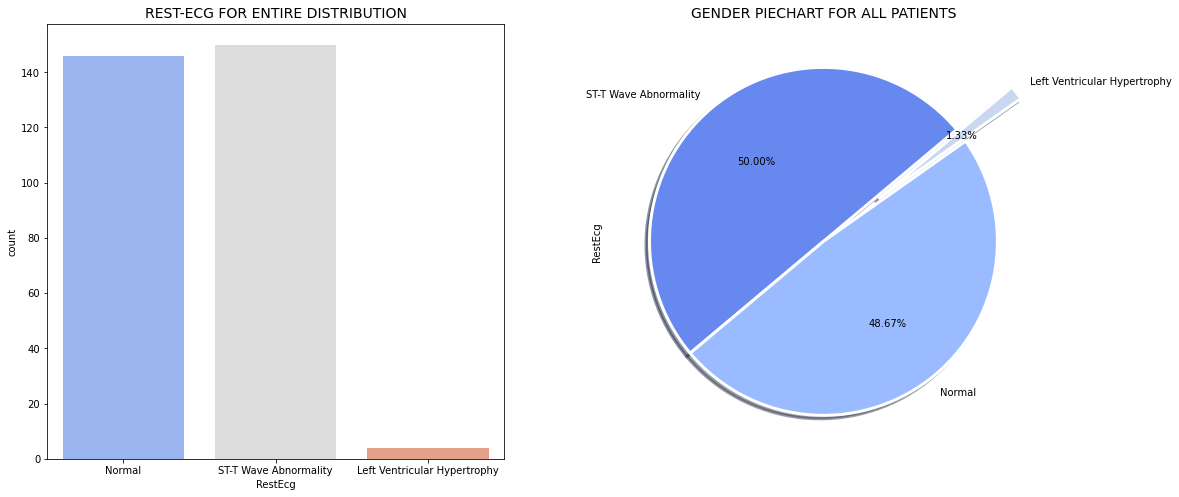

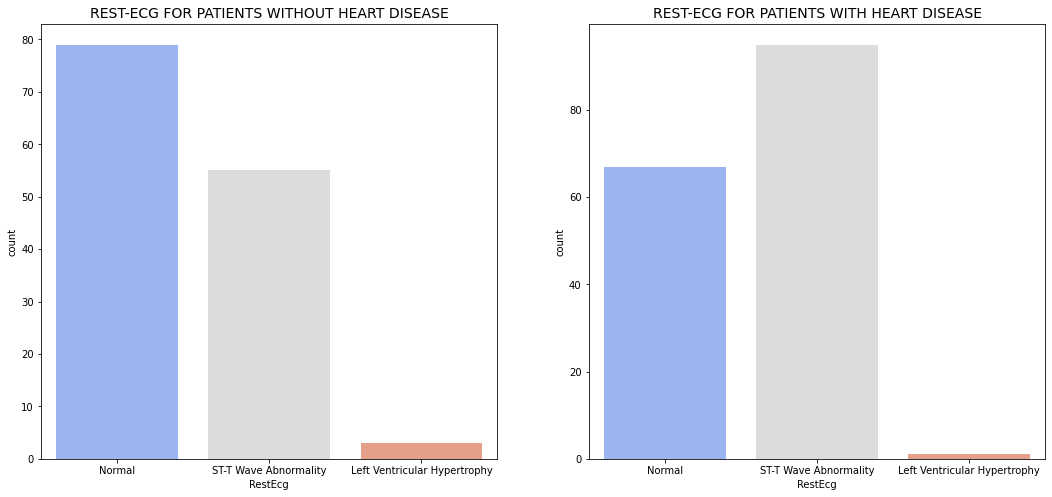

In [44]:
# plotting 'RestEcg' for the entire distribution, and against patients with and without heart diseases

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['RestEcg'], palette='coolwarm')
plt.title('REST-ECG FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["RestEcg"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm"),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.4], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['RestEcg'], palette='coolwarm')
plt.title('REST-ECG FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['RestEcg'], palette='coolwarm')
plt.title('REST-ECG FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)
plt.show()


In [45]:
# Distribution of patients based on REST ECG
plot_criteria= ['RestEcg', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
RestEcg,,
Left Ventricular Hypertrophy,0.610000,2.190000
Normal,41.100000,57.660000
ST-T Wave Abnormality,58.280000,40.150000


**Distribution of Exercise Angina**

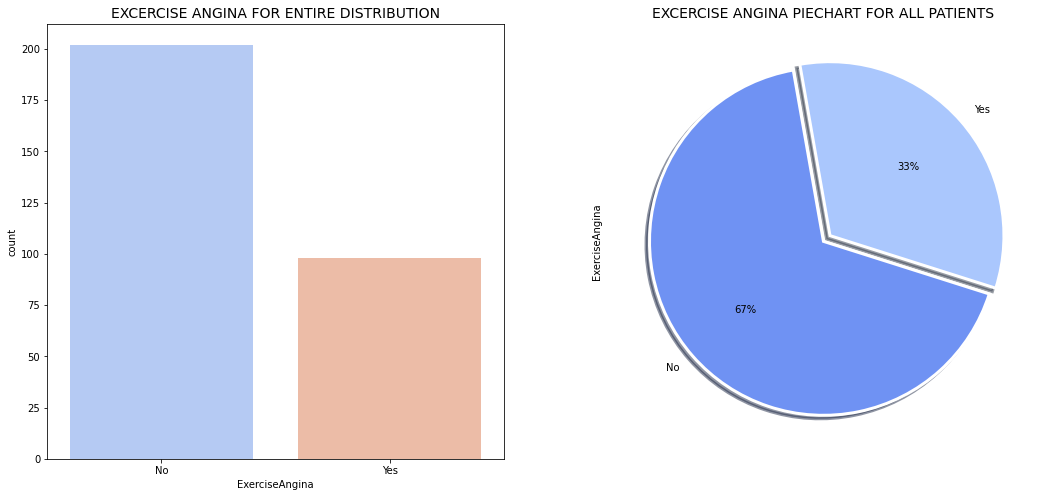

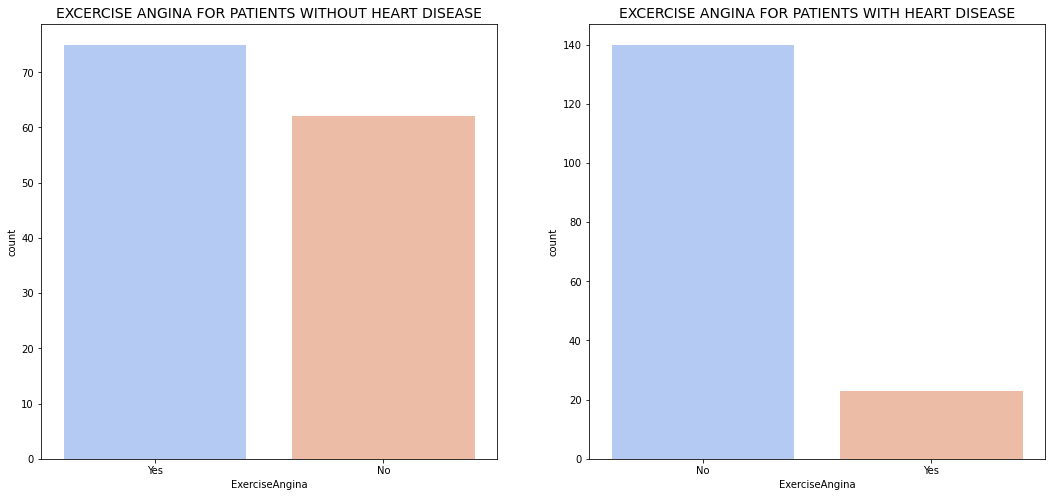

In [46]:
# plotting 'ExerciseAngina' for the entire distribution, and against patients with and without heart diseases

# plotting for all patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['ExerciseAngina'], palette='coolwarm')
plt.title('EXCERCISE ANGINA FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["ExerciseAngina"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("coolwarm",5),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("EXCERCISE ANGINA PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['ExerciseAngina'], palette='coolwarm')
plt.title('EXCERCISE ANGINA FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['ExerciseAngina'], palette='coolwarm')
plt.title('EXCERCISE ANGINA FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

In [47]:
# Distribution of patients based on ExerciseAngina
plot_criteria= ['ExerciseAngina', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
ExerciseAngina,,
No,85.890000,45.260000
Yes,14.110000,54.740000


**Distribution of Slope**

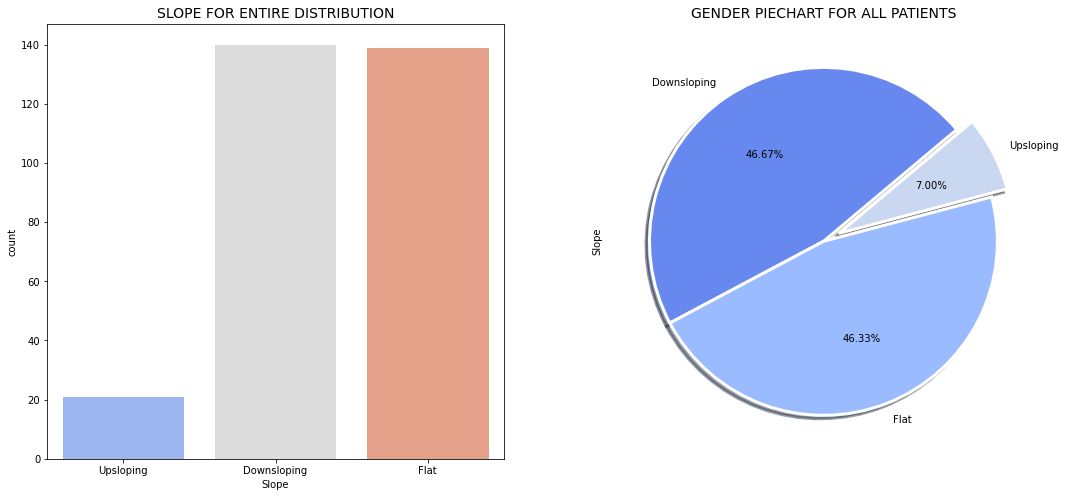

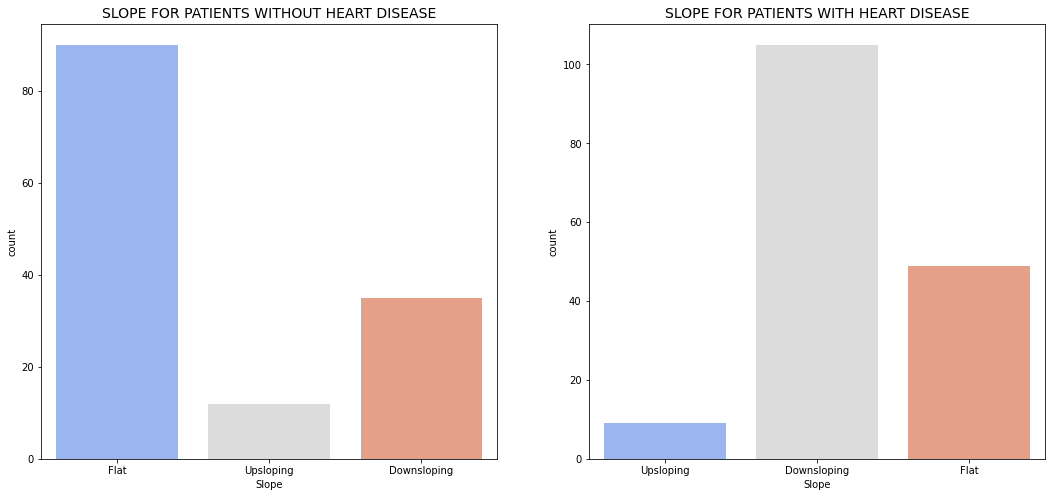

In [48]:
# plotting 'Slope' for the entire distribution, and against patients with and without heart diseases

# plotting for all patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['Slope'], palette='coolwarm')
plt.title('SLOPE FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["Slope"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm"),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.1], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['Slope'], palette='coolwarm')
plt.title('SLOPE FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['Slope'], palette='coolwarm')
plt.title('SLOPE FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

In [49]:
# Distribution of patients based on Slope
plot_criteria= ['Slope', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
Slope,,
Downsloping,64.420000,25.550000
Flat,30.060000,65.690000
Upsloping,5.520000,8.760000


**Distribution of Major Vessels Colored**

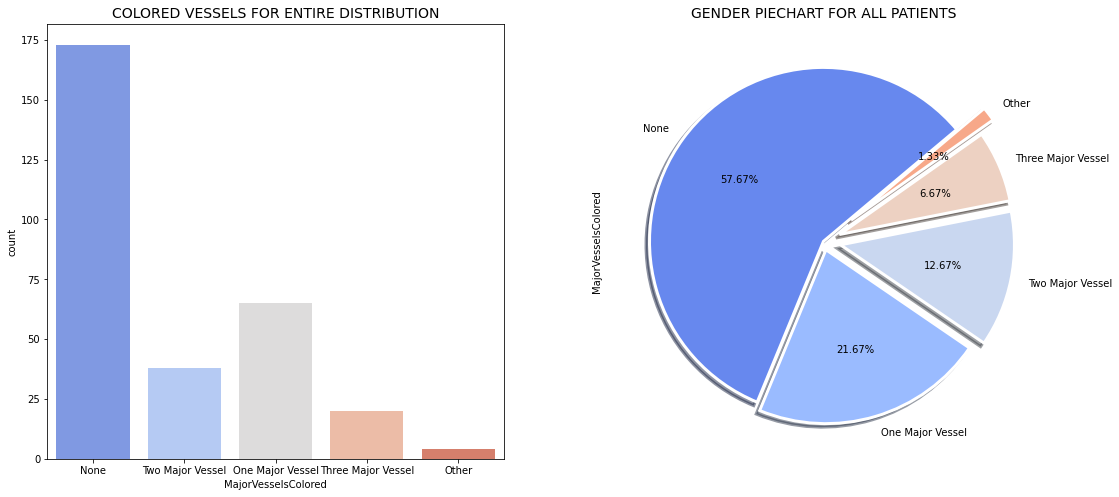

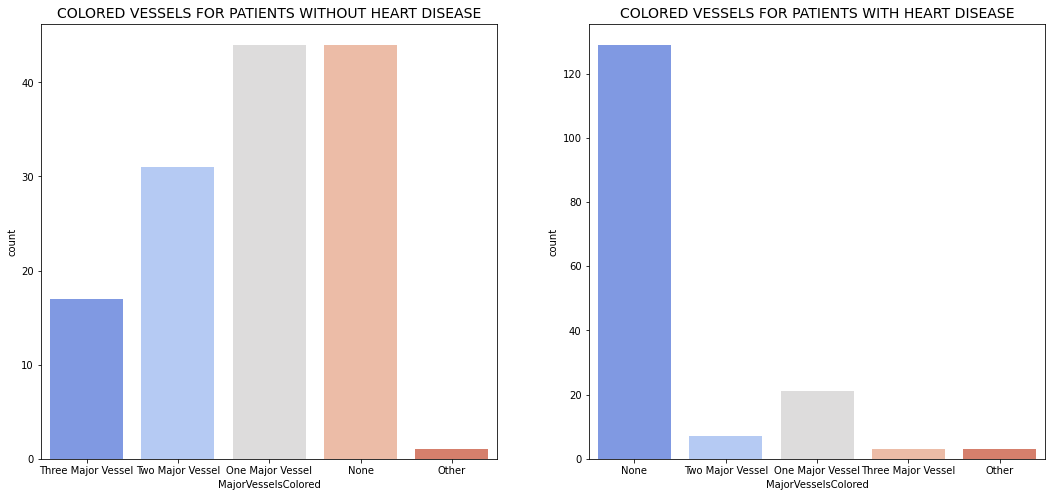

In [50]:
# plotting 'MajorVesselsColored' for the entire distribution, and against patients with and without heart diseases

# plotting for all patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['MajorVesselsColored'], palette='coolwarm')
plt.title('COLORED VESSELS FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["MajorVesselsColored"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm"),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2,.1,.1,.2], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['MajorVesselsColored'], palette='coolwarm')
plt.title('COLORED VESSELS FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['MajorVesselsColored'], palette='coolwarm')
plt.title('COLORED VESSELS FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

In [51]:
# Distribution of patients based on MajorVesselsColored
plot_criteria= ['MajorVesselsColored', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
MajorVesselsColored,,
None,79.140000,32.120000
One Major Vessel,12.880000,32.120000
Other,1.840000,0.730000
Three Major Vessel,1.840000,12.410000
Two Major Vessel,4.290000,22.630000


**Distribution of Thalassemia**

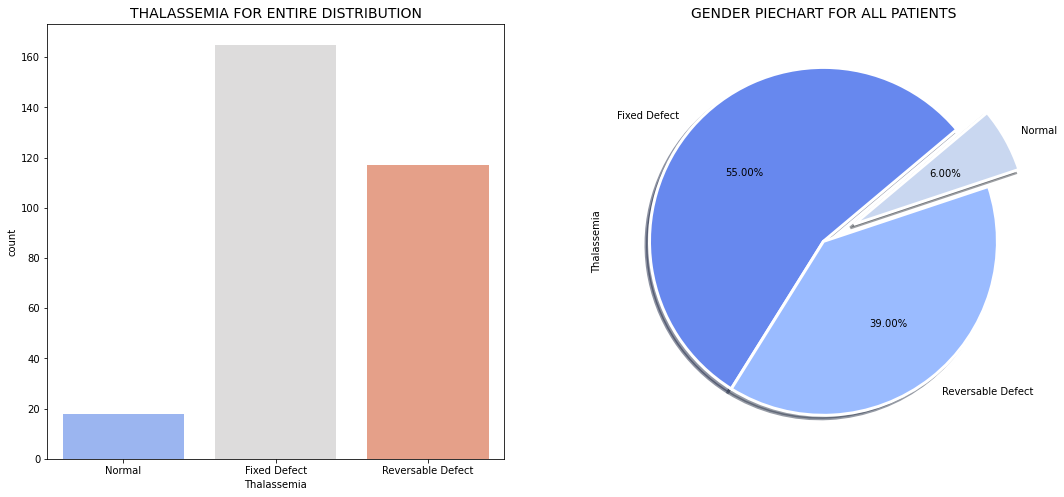

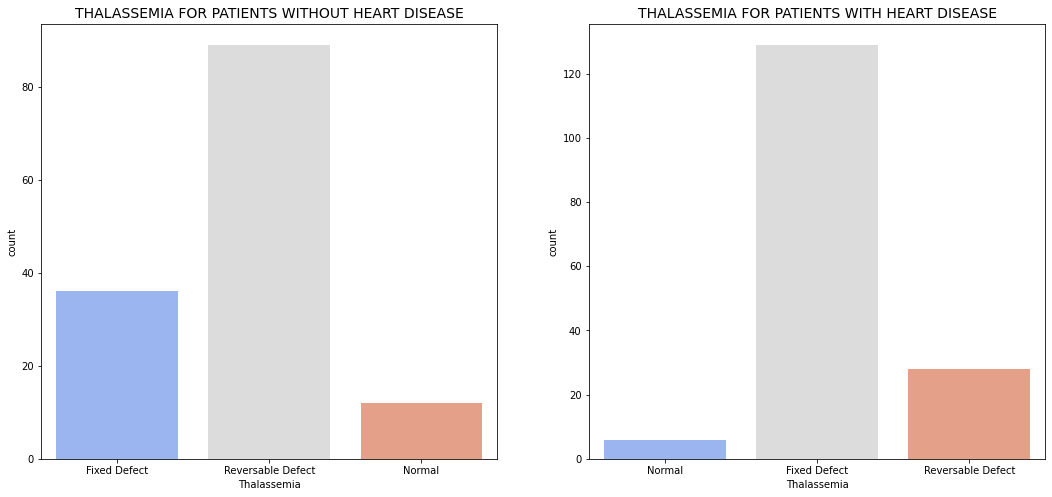

In [52]:
# plotting 'Thalassemia' for the entire distribution, and against patients with and without heart diseases

# plotting for all patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(heart_df['Thalassemia'], palette='coolwarm')
plt.title('THALASSEMIA FOR ENTIRE DISTRIBUTION', weight='light', fontsize=14)

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
heart_df["Thalassemia"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("coolwarm"),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.2], shadow=True)
plt.title("GENDER PIECHART FOR ALL PATIENTS", weight='light', fontsize=14)

# plotting for patients without heart disease
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Goal0['Thalassemia'], palette='coolwarm')
plt.title('THALASSEMIA FOR PATIENTS WITHOUT HEART DISEASE', weight='light', fontsize=14)

# plotting for patients with heart disease
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Goal1['Thalassemia'], palette='coolwarm')
plt.title('THALASSEMIA FOR PATIENTS WITH HEART DISEASE', weight='light', fontsize=14)

plt.show()

In [53]:
# Distribution of patients based on Thalassemia
plot_criteria= ['Thalassemia', 'Goal']
cm = sns.light_palette("blue", as_cmap=True)
(round(pd.crosstab(heart_df[plot_criteria[0]], heart_df[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Goal,Has Disease,No Disease
Thalassemia,,
Fixed Defect,79.140000,26.280000
Normal,3.680000,8.760000
Reversable Defect,17.180000,64.960000


# Machine Learning Part B

In [54]:
# Python libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ML algorithms & cross validation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Python libraries for machine learning evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import matthews_corrcoef,fbeta_score,log_loss,precision_score,f1_score,recall_score
from sklearn import metrics

from scipy import stats


Preparing the data for Model 

Feature Normalization

In [55]:
#Going back to original 'dt' dataframe for the application of Machine learning techniques
df_ml = pd.read_csv('heart_ML.csv')

In [56]:
# checking shape of dataset after outlier removal
df_ml.shape

(302, 14)

In [57]:
df_ml['Goal'].value_counts()

1    164
0    138
Name: Goal, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['Age','RestBP','Cholesterol','MaxHeartRate','ST_Depression']
df_ml[columns_to_scale] = StandardScaler.fit_transform(df_ml[columns_to_scale])

In [59]:
df_ml.head()

,Age,Sex,ChestPain,RestBP,Cholesterol,FastingBloodSugar,RestEcg,MaxHeartRate,ExerciseAngina,ST_Depression,Slope,MajorVesselsColored,Thalassemia,Goal
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [60]:
#seperating 'goal' variable from other features
X = df_ml.drop(['Goal'], axis=1) 
y = df_ml['Goal']

In [61]:
X.head()

,Age,Sex,ChestPain,RestBP,Cholesterol,FastingBloodSugar,RestEcg,MaxHeartRate,ExerciseAngina,ST_Depression,Slope,MajorVesselsColored,Thalassemia
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2


In [62]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Goal, dtype: int64

REchecking Correlation

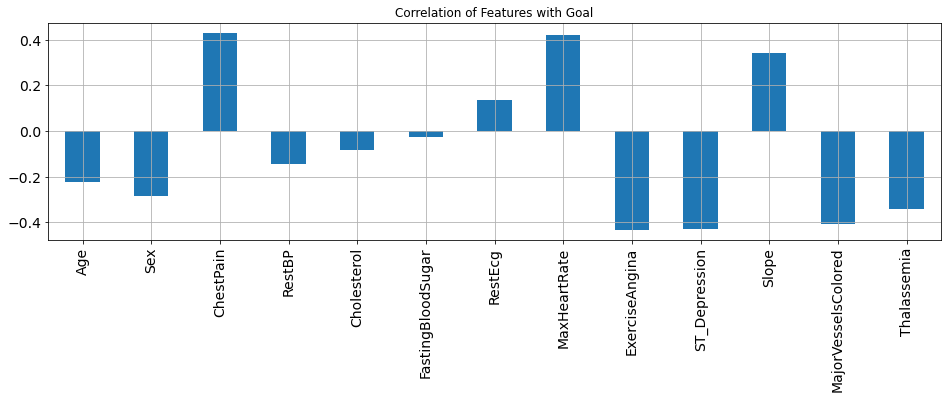

In [63]:

#Correlation with Response Variable class

X.corrwith(y).plot.bar(figsize = (16, 4), 
                       title = "Correlation of Features with Goal", fontsize = 14, 
                       rot = 90, grid = True)
plt.show()

In [64]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [65]:
## checking distribution of Goal variable in train test split
print(' ')
print('*****************************************************')
print("------'X' & 'y' Test & Train Sizes-------------------")
print('*****************************************************')
print('X_train Size = ', X_train.size, '::::: X_test Size = ',X_test.size)
print('y_train Size = ', y_train.size, ' ::::: y_test Size = ', y_test.size)

print(' ')

print('*****************************************************')
print('*****************************************************')

print('Distribution of Goal variable in training set')
print(y_train.value_counts())

print('Distribution of Goal variable in test set')
print(y_test.value_counts())

 
*****************************************************
------'X' & 'y' Test & Train Sizes-------------------
*****************************************************
X_train Size =  3133 ::::: X_test Size =  793
y_train Size =  241  ::::: y_test Size =  61
 
*****************************************************
*****************************************************
Distribution of Goal variable in training set
1    129
0    112
Name: Goal, dtype: int64
Distribution of Goal variable in test set
1    35
0    26
Name: Goal, dtype: int64


In [66]:
print('*****************************************************')

print('Shape of "Training Set" X_train and Y_train')
print('X_train = ', X_train.shape, ' ::::: y_train = ', y_train.shape)
print(' ')
print('*****************************************************')
print('*****************************************************')

print('Shape of "Test Sets" X_test and Y_test')
print('X_test  =  ', X_test.shape, ' ::::: y_test = ', y_test.shape)
print(' ')
print('*****************************************************')

*****************************************************
Shape of "Training Set" X_train and Y_train
X_train =  (241, 13)  ::::: y_train =  (241,)
 
*****************************************************
*****************************************************
Shape of "Test Sets" X_test and Y_test
X_test  =   (61, 13)  ::::: y_test =  (61,)
 
*****************************************************


# Cross Validation of Models

In [67]:
import xgboost as xgb
# creating basemodels for the baseline machine learning algorithms

def GetBasedModel():
    basedModels = []
    basedModels.append(('ABC'   , AdaBoostClassifier()))
    basedModels.append(('DTC' , DecisionTreeClassifier()))
    basedModels.append(('ETC100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ETC500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    basedModels.append(('GNB'   , GaussianNB()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('KNN_5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN_7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN_9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN_11'  , KNeighborsClassifier(11)))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('SGDC - 1000', SGDClassifier(max_iter=1000, tol=1e-4))) 
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100, eval_metric='mlogloss')))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000, eval_metric='mlogloss')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000, eval_metric='mlogloss')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    
    return basedModels

In [68]:
# initializing 10-fold cross validation fo the base models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
        cross_vals = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cross_vals)
        names.append(name)
        listn = "%s: %f (%f)" % (name, cross_vals.mean(), cross_vals.std())
        print(listn)
         
        
    return results,listn

In [69]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

ABC: 0.754667 (0.069233)
DTC: 0.779833 (0.081797)
ETC100: 0.825500 (0.052541)
ETC500: 0.804667 (0.065247)
ET1000: 0.812667 (0.073103)
GNB: 0.796333 (0.078361)
GBM: 0.808833 (0.073121)
LR_L2: 0.816833 (0.081940)
LDA: 0.816833 (0.081940)
MLP: 0.821000 (0.077241)
KNN_5: 0.783667 (0.085511)
KNN_7: 0.779500 (0.072927)
KNN_9: 0.779500 (0.077542)
KNN_11: 0.775167 (0.088146)
SVM Linear: 0.821167 (0.075085)
SVM RBF: 0.796167 (0.071407)
SGDC - 1000: 0.737500 (0.126450)
XGB_100: 0.784000 (0.067195)
XGB_500: 0.796500 (0.080376)
XGB_2000: 0.784000 (0.074544)
XGB_1000: 0.792333 (0.081589)
RF_Ent100: 0.817333 (0.079660)
RF_Gini100: 0.804667 (0.072793)


# MODELS

# Logistics Regression

In [70]:
Lreg = LogisticRegression()
Lreg.fit(X_train, y_train)
Lreg_pred = Lreg.predict(X_test)

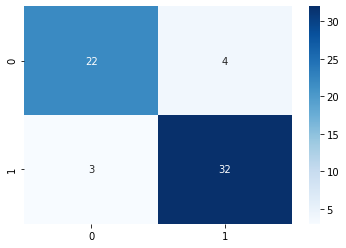

In [71]:
cm=confusion_matrix(y_test,Lreg_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [72]:
accuracy_score(y_test,Lreg_pred)

0.8852459016393442

In [73]:
print(classification_report(y_test, Lreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



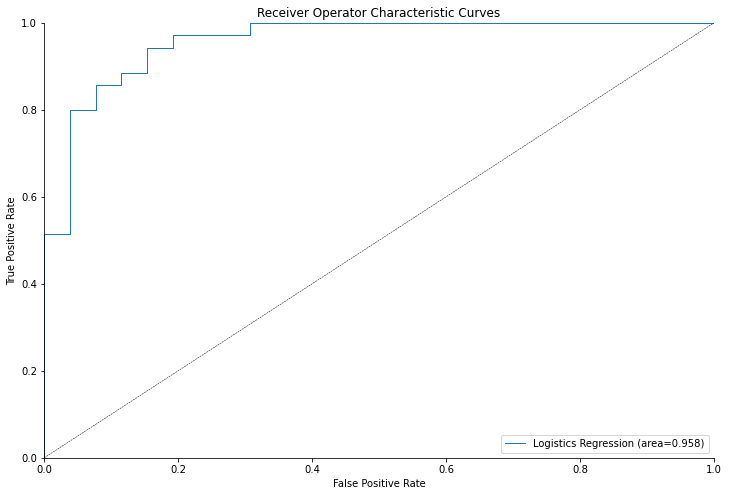

In [74]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,Lreg.predict_proba(X_test),label='Logistics Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

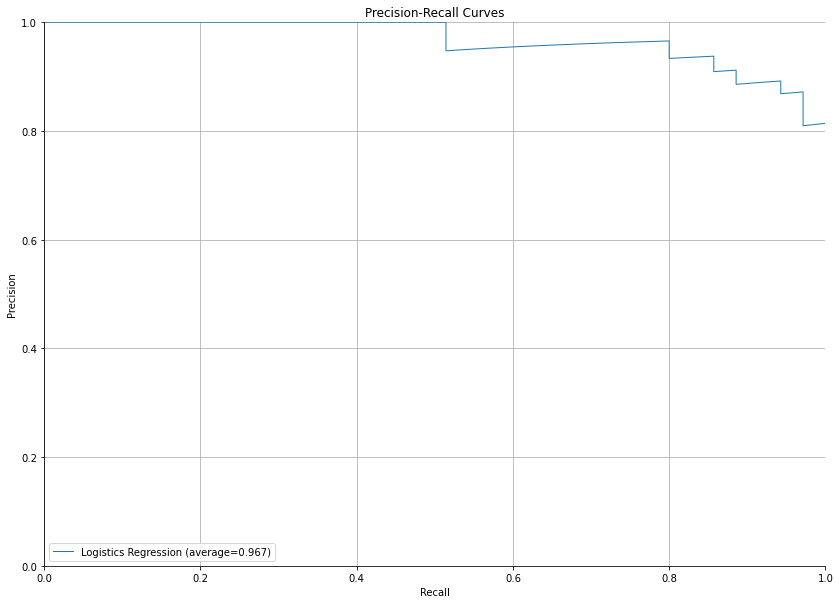

In [75]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,Lreg.predict_proba(X_test),label='Logistics Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Random Forest Classifier (criterion = 'entropy')

In [76]:
rfc_ent = RandomForestClassifier(criterion='entropy',n_estimators=1000)
rfc_ent.fit(X_train, y_train)
rfc_ent_pred = rfc_ent.predict(X_test)

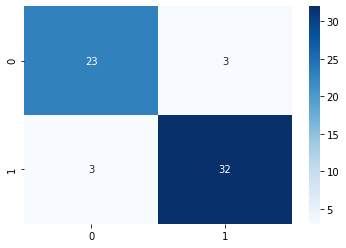

In [77]:
cm=confusion_matrix(y_test,rfc_ent_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [78]:
accuracy_score(y_test,rfc_ent_pred)

0.9016393442622951

In [79]:
print(classification_report(y_test, rfc_ent_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.91      0.91      0.91        35

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



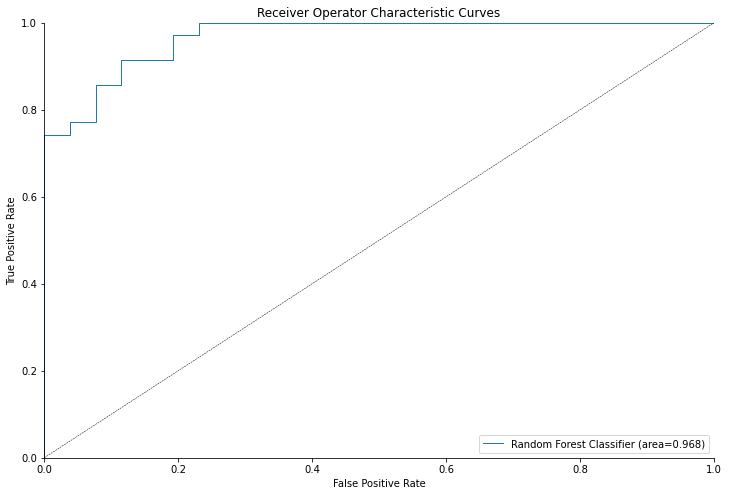

In [80]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,rfc_ent.predict_proba(X_test),label='Random Forest Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

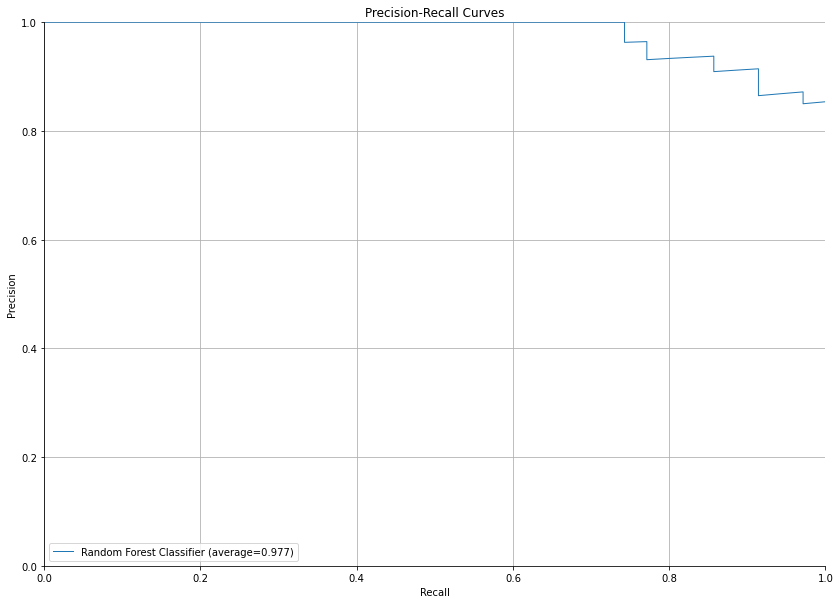

In [81]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,rfc_ent.predict_proba(X_test),label='Random Forest Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Multi Layer Perceptron

In [82]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)

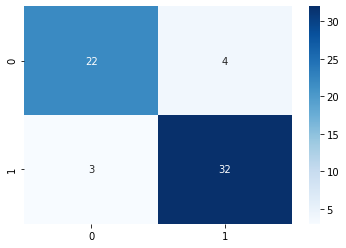

In [83]:
cm=confusion_matrix(y_test,mlp_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [84]:
accuracy_score(y_test,mlp_pred)

0.8852459016393442

In [85]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



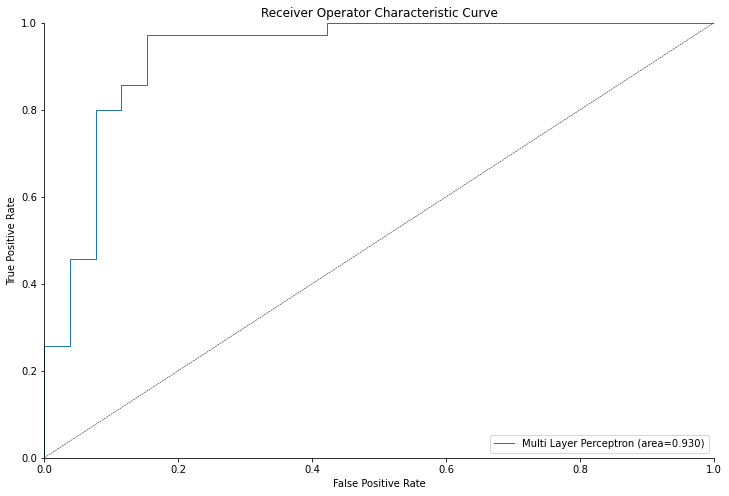

In [86]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,mlp.predict_proba(X_test),label='Multi Layer Perceptron',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

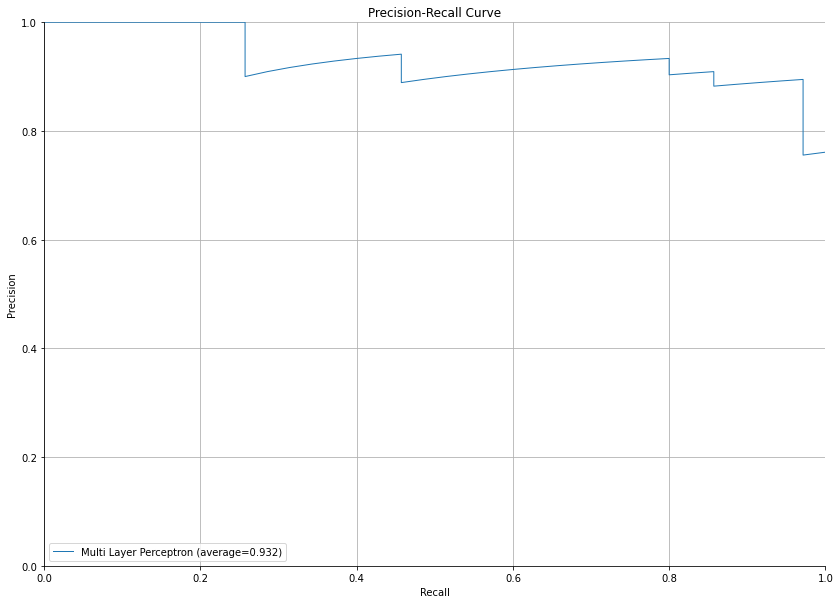

In [87]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,mlp.predict_proba(X_test),label='Multi Layer Perceptron',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# K' Nearest Neighbour (n=9)

In [88]:
knn9 = KNeighborsClassifier(7)
knn9.fit(X_train,y_train)
knn9_pred = knn9.predict(X_test)

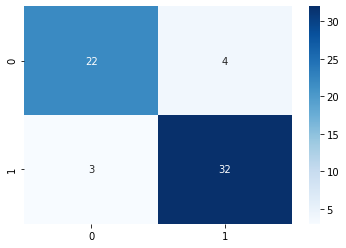

In [89]:
cm=confusion_matrix(y_test,knn9_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [90]:
accuracy_score(y_test,knn9_pred)

0.8852459016393442

In [91]:
print(classification_report(y_test, knn9_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



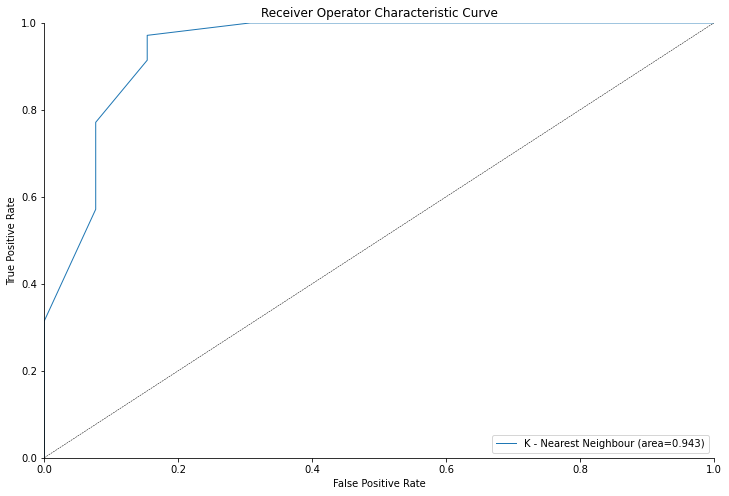

In [92]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,knn9.predict_proba(X_test),label='K - Nearest Neighbour',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

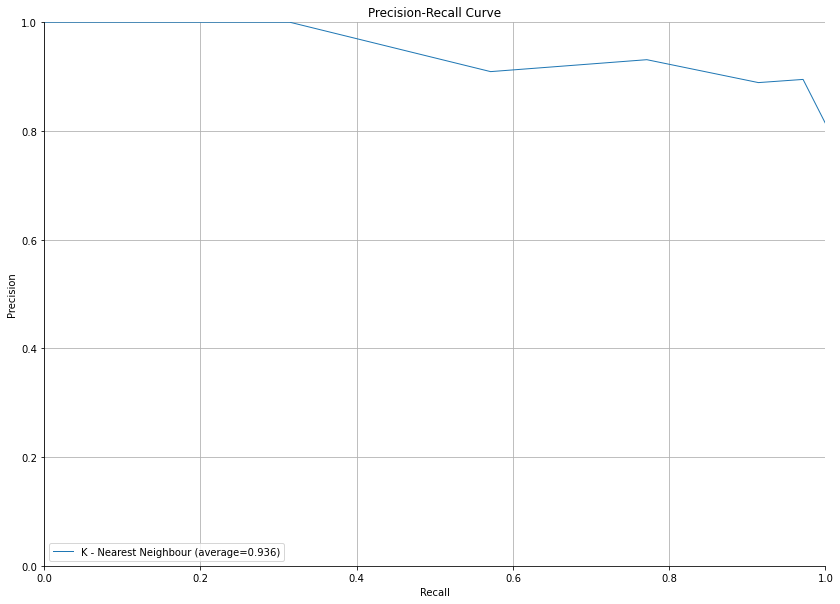

In [93]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,knn9.predict_proba(X_test),label='K - Nearest Neighbour',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Extra Tree Classifier (n_estimators=100)

In [94]:
etc_100 = ExtraTreesClassifier(n_estimators= 100)
etc_100.fit(X_train,y_train)
etc_100_pred = etc_100.predict(X_test)

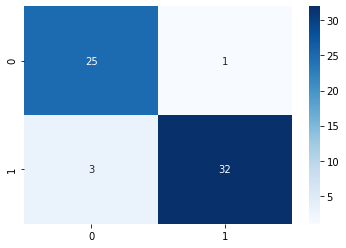

In [95]:
cm=confusion_matrix(y_test,etc_100_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [96]:
accuracy_score(y_test,etc_100_pred)

0.9344262295081968

In [97]:
print(classification_report(y_test, etc_100_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.97      0.91      0.94        35

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



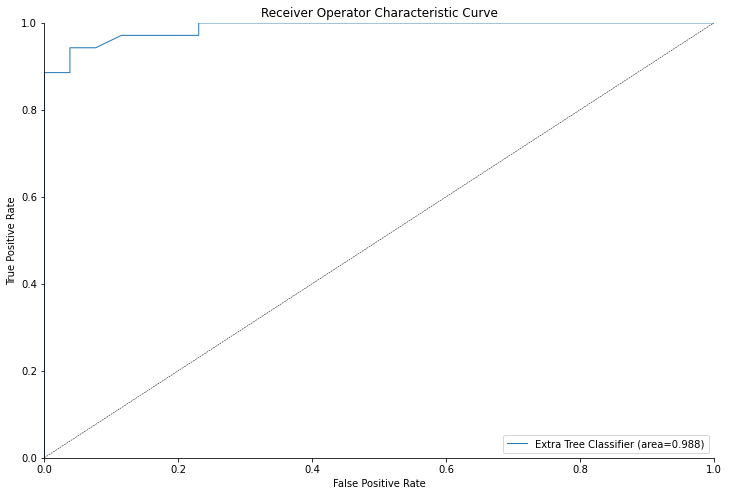

In [98]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,etc_100.predict_proba(X_test),label='Extra Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

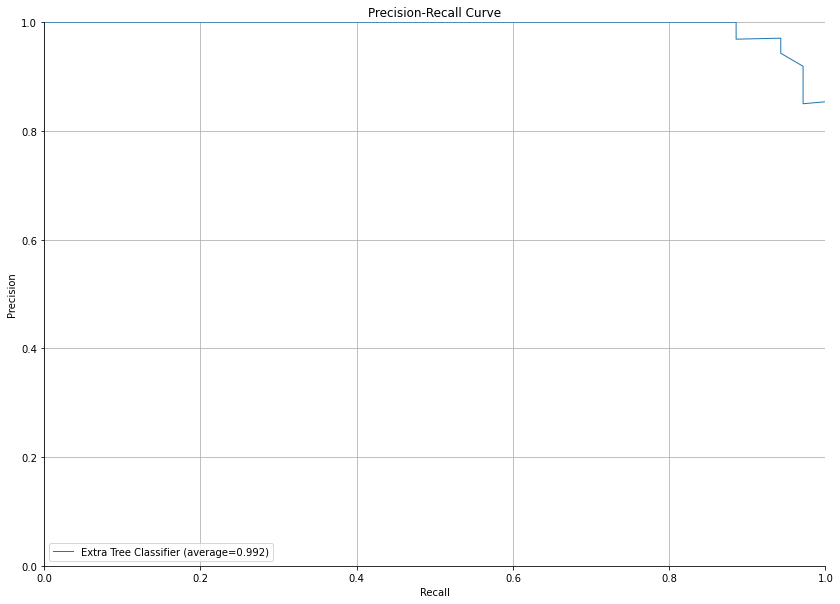

In [99]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,etc_100.predict_proba(X_test),label='Extra Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# XGBoost (n_estimators=500)

In [100]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

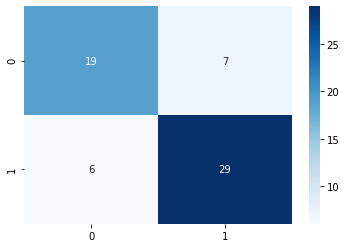

In [101]:
cm=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [102]:
accuracy_score(y_test,xgb_pred)

0.7868852459016393

In [103]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



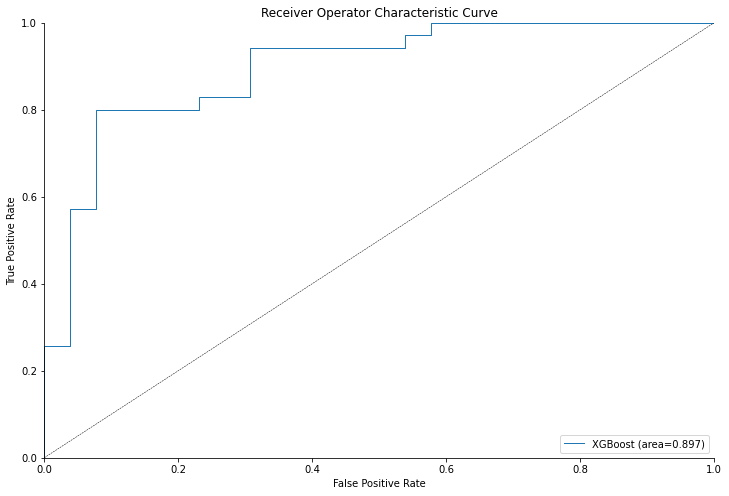

In [104]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

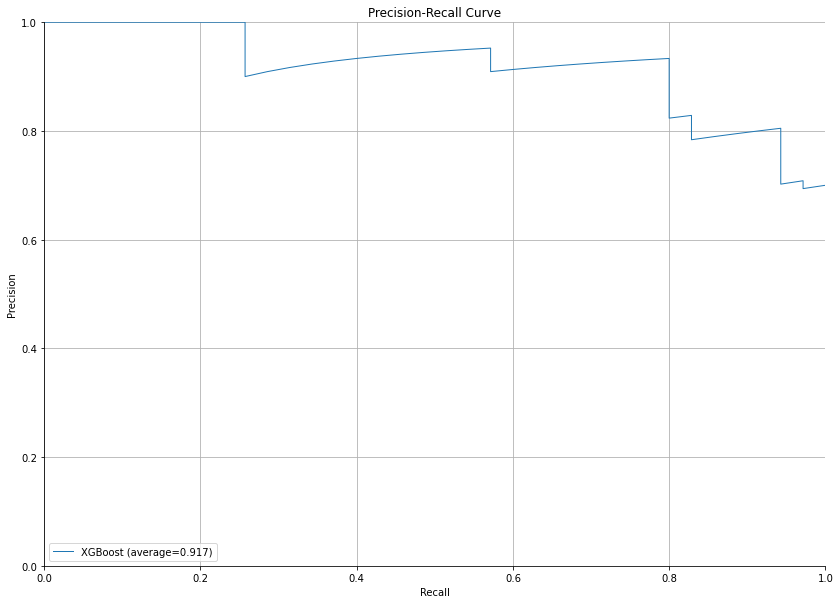

In [105]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Support Vector Classifier (kernel='linear')

In [106]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

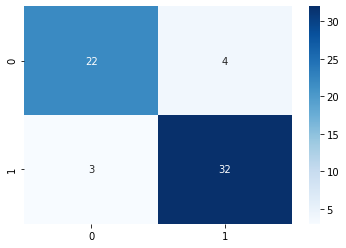

In [107]:
cm=confusion_matrix(y_test,svc_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [108]:
accuracy_score(y_test,svc_pred)

0.8852459016393442

In [109]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.89      0.91      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



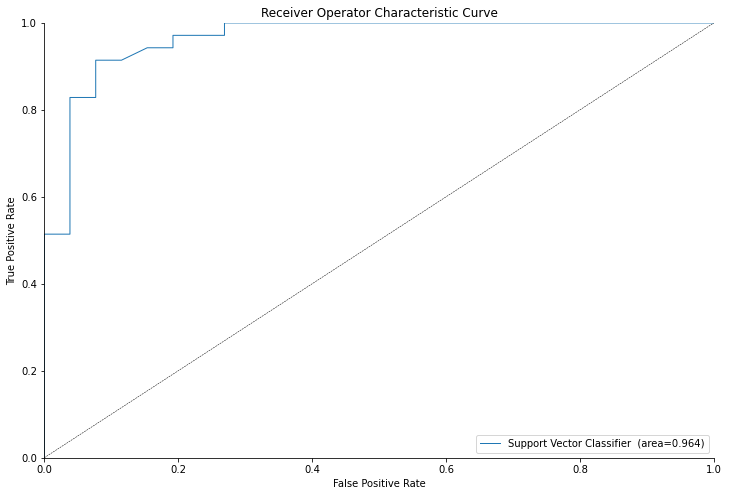

In [110]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,svc.predict_proba(X_test),label='Support Vector Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

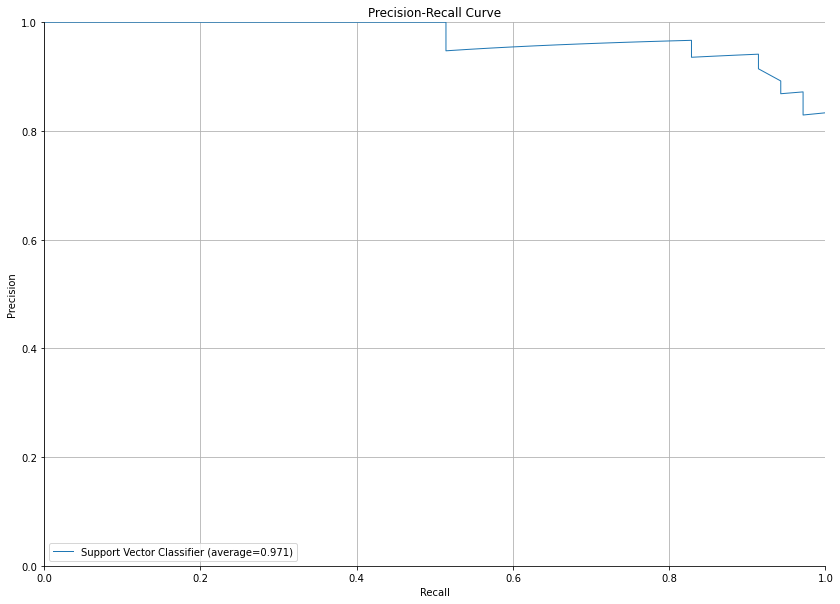

In [111]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,svc.predict_proba(X_test),label='Support Vector Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Stochastic Gradient Descent

In [112]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
sgd_pred = sgd.predict(X_test)

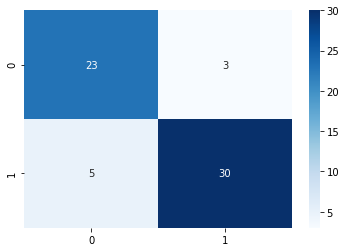

In [113]:
cm=confusion_matrix(y_test,sgd_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [114]:
accuracy_score(y_test,sgd_pred)

0.8688524590163934

In [115]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.91      0.86      0.88        35

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [116]:
# #currently with errors, needs to be fine tunned

# f, ax = plt.subplots(figsize=(12,8))

# roc_auc_plot(y_test,sgd.predict_proba(X_test),label='Stochastic Gradient Descent',l='-')

# ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
#         )    
# ax.legend(loc="lower right")    
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Receiver Operator Characteristic Curve')
# sns.despine()

In [117]:
# #currently with errors, needs to be fine tunned

# f, ax = plt.subplots(figsize=(14,10))

# precision_recall_plot(y_test,sgd.predict_proba(X_test),label='Stochastic Gradient Descent',l='-')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.legend(loc="lower left")
# ax.grid(True)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Precision-Recall Curve')
# sns.despine()

# Adaboost Classifier

In [118]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)

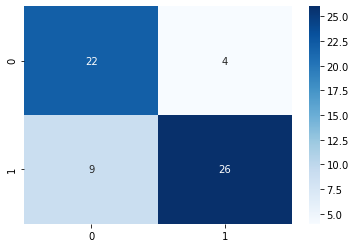

In [119]:
cm=confusion_matrix(y_test,ada_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [120]:
accuracy_score(y_test,ada_pred)

0.7868852459016393

In [121]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       0.87      0.74      0.80        35

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



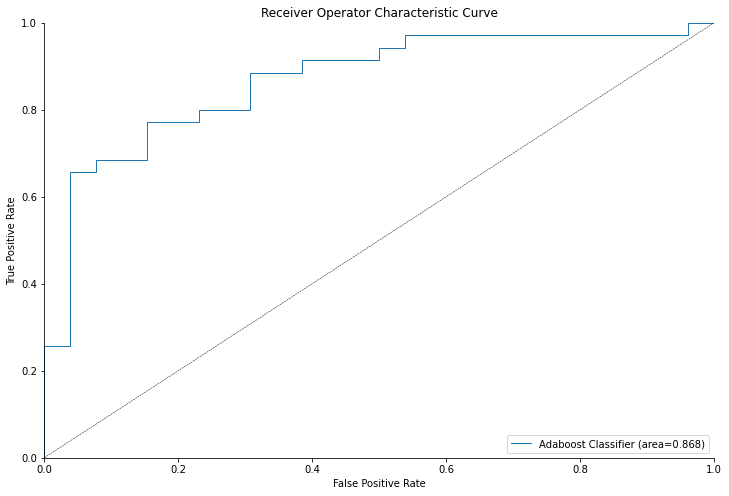

In [122]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,ada.predict_proba(X_test),label='Adaboost Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

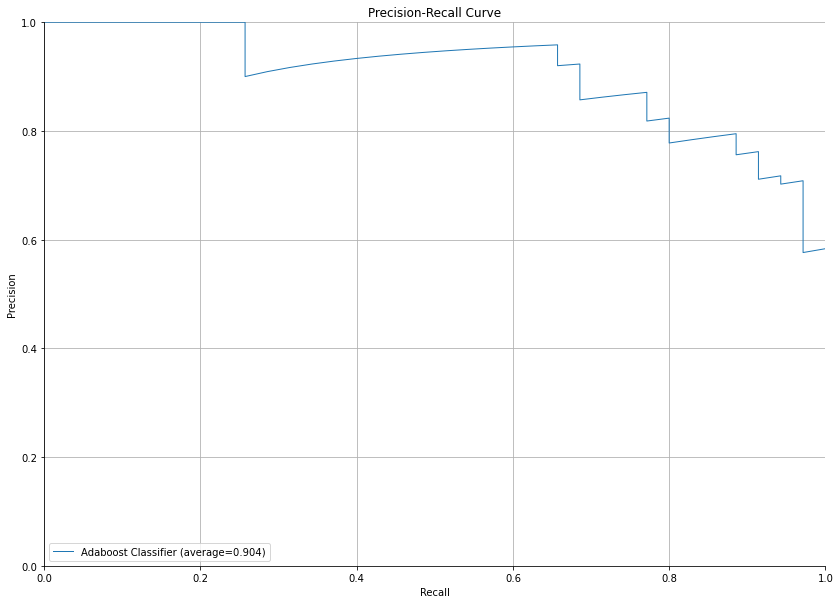

In [123]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,ada.predict_proba(X_test),label='Adaboost Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Decision Tree Classifier (CART)

In [124]:
# dtc = DecisionTreeClassifier()
# dtc.fit(X_train,y_train)
# dtc_pred = dtc.predict(X_test)

In [125]:
#pip install pydotplus

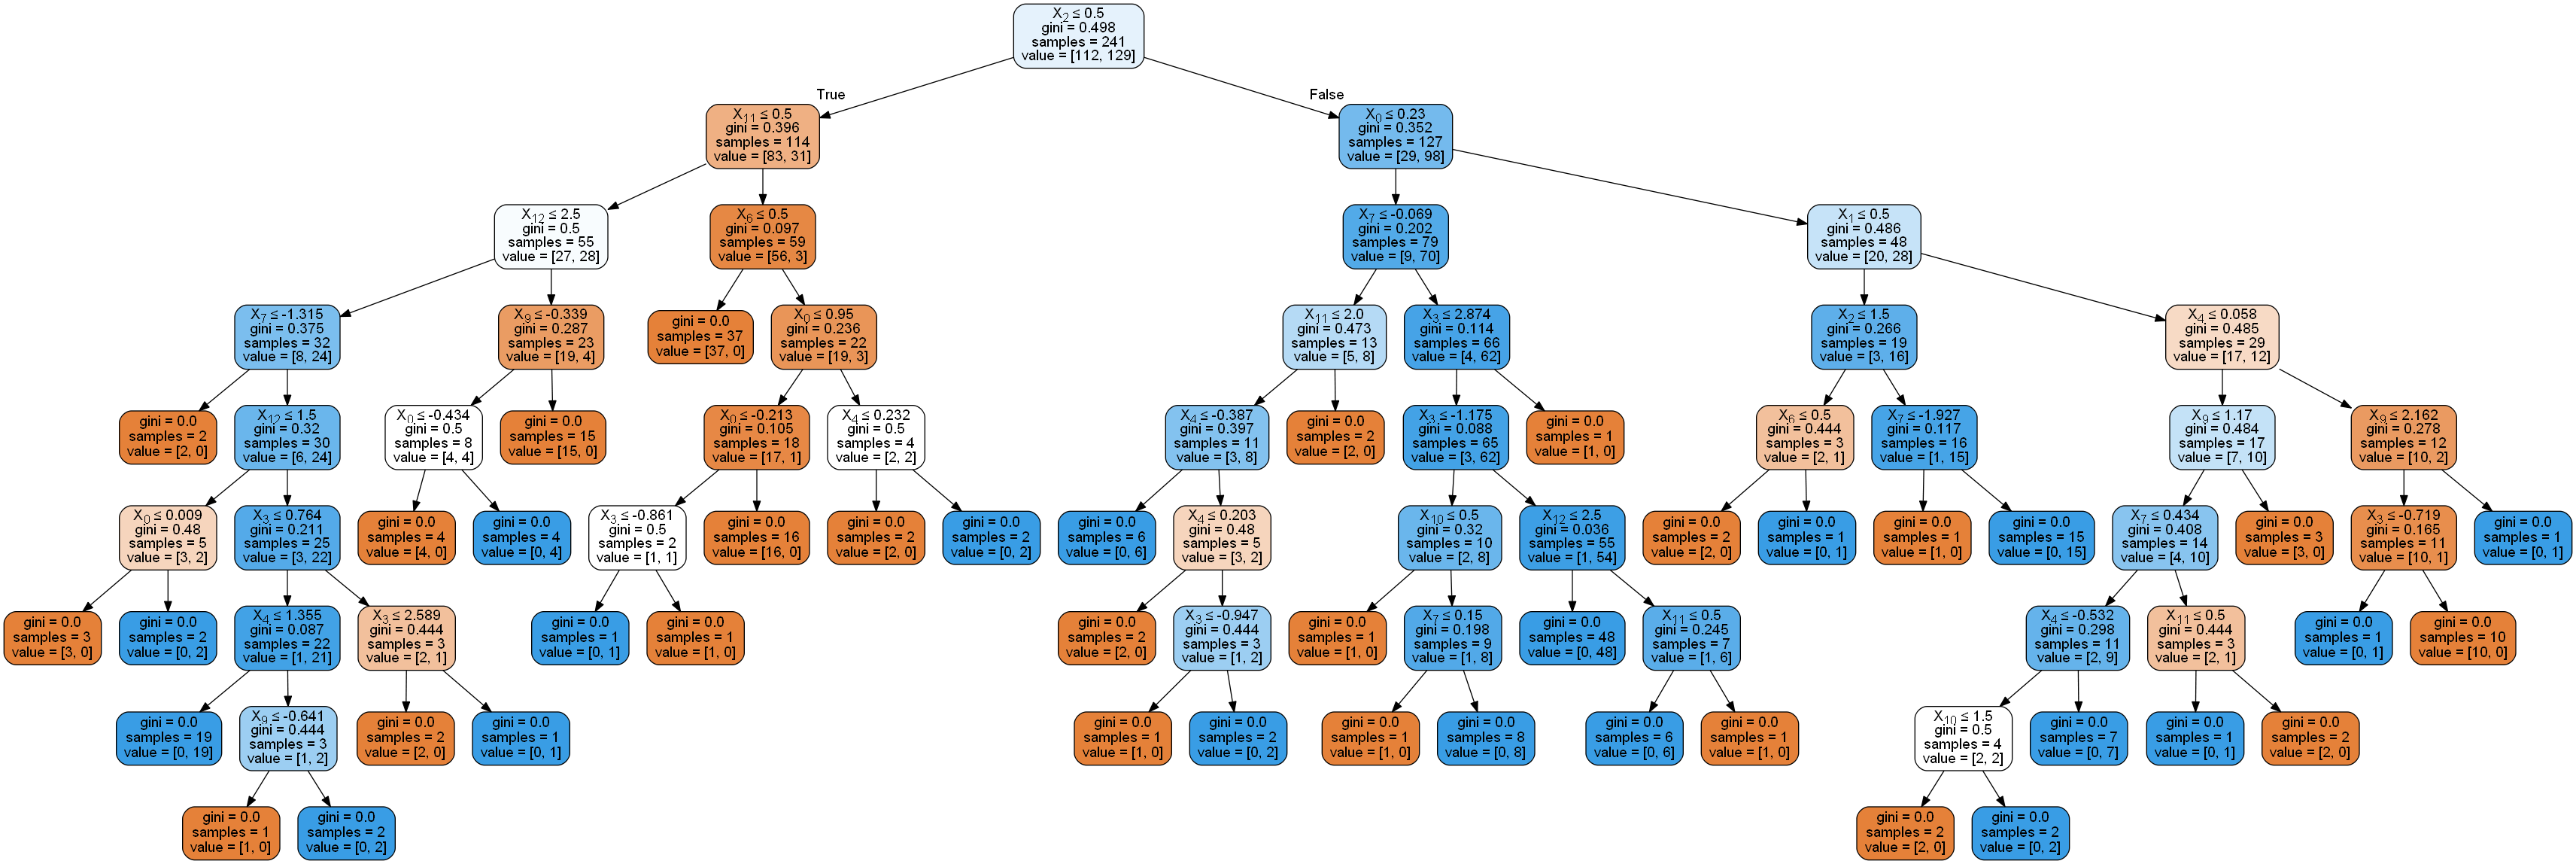

In [126]:
#Visualizing the tree
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus


dtc = DecisionTreeClassifier()
clf = dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

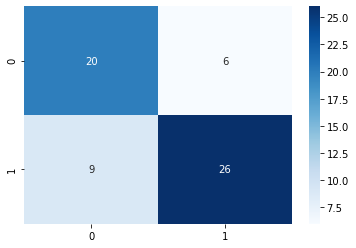

In [127]:
cm=confusion_matrix(y_test,dtc_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [128]:
accuracy_score(y_test,dtc_pred)

0.7540983606557377

In [129]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       0.81      0.74      0.78        35

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.76        61



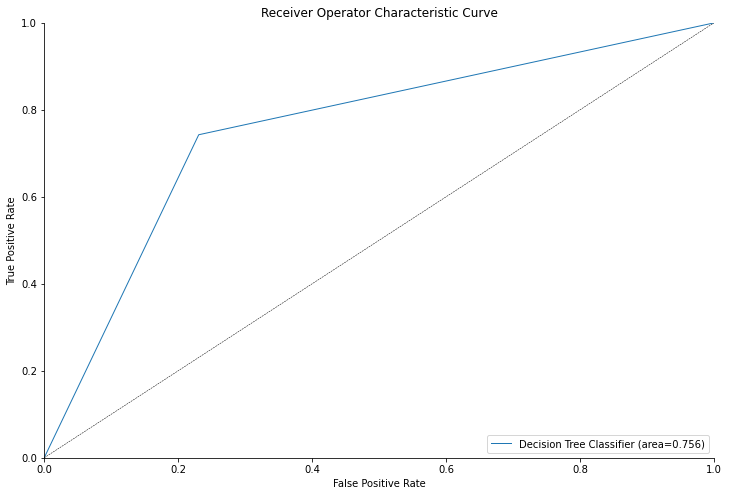

In [130]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,dtc.predict_proba(X_test),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

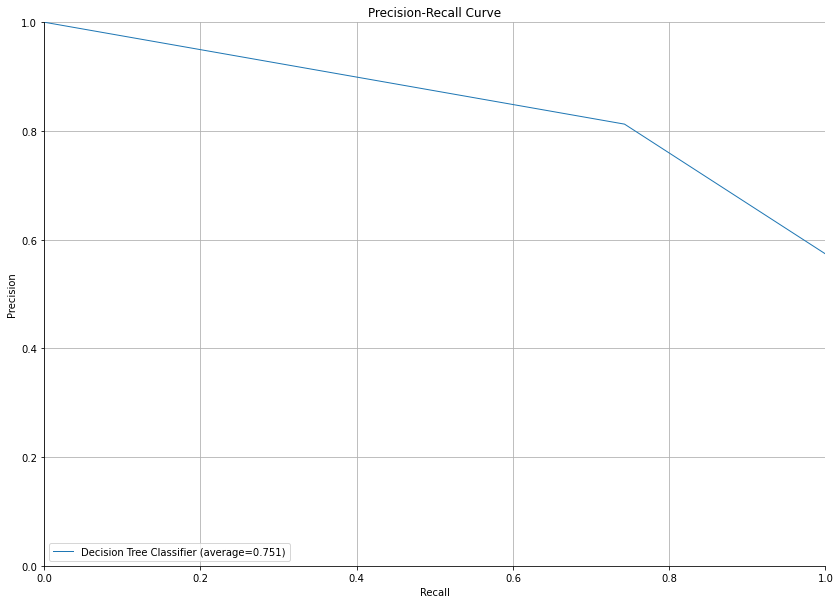

In [131]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,dtc.predict_proba(X_test),label='Decision Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Gradient Boosting Machine

In [132]:
gbc = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)

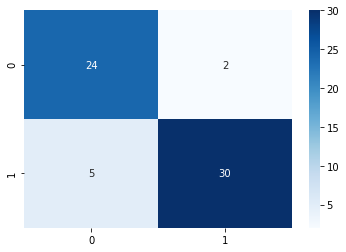

In [133]:
cm=confusion_matrix(y_test,gbc_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [134]:
accuracy_score(y_test,gbc_pred)

0.8852459016393442

In [135]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.94      0.86      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



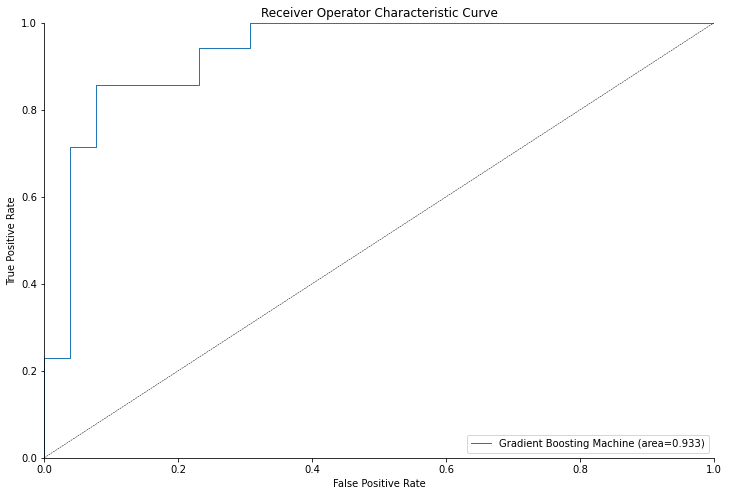

In [136]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,gbc.predict_proba(X_test),label='Gradient Boosting Machine',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

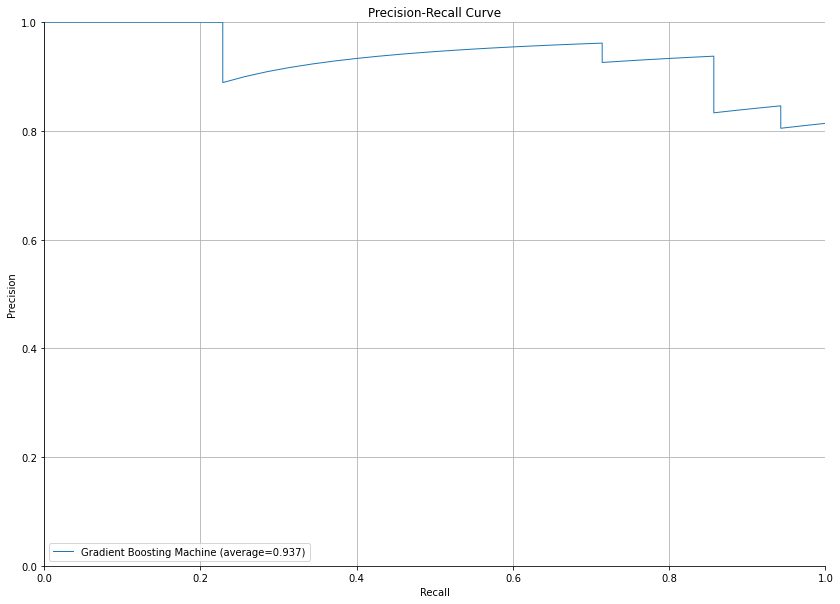

In [137]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,gbc.predict_proba(X_test),label='Gradient Boosting Machine',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Comparison of All Models

Model	/ Accuracy	/ Precision	/ Sensitivity	/ Specificity	/ F1 Score	/ ROC	/ Log_Loss	/ mathew_corrcoef

In [138]:
CM=confusion_matrix(y_test,rfc_ent_pred)
#sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, rfc_ent_pred)
acc = accuracy_score(y_test, rfc_ent_pred)
roc = roc_auc_score(y_test, rfc_ent_pred)
prec = precision_score(y_test, rfc_ent_pred)
rec = recall_score(y_test, rfc_ent_pred)
f1 = f1_score(y_test, rfc_ent_pred)

mathew = matthews_corrcoef(y_test, rfc_ent_pred)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])



In [139]:
data = {        'MLP': mlp_pred, 
                'KNN': knn9_pred, 
                'EXtra tree classifier': etc_100_pred,
                'XGB': xgb_pred, 
                'SVC': svc_pred, 
                'SGD': sgd_pred,
                'Adaboost': ada_pred, 
                'CART': dtc_pred, 
                'GBM': gbc_pred }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)


model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.901639,0.914286,0.914286,0.884615,0.914286,0.899451,3.397296,0.798901
1,MLP,0.885246,0.888889,0.914286,0.846154,0.901408,0.880220,3.963519,0.764653
2,KNN,0.885246,0.888889,0.914286,0.846154,0.901408,0.880220,3.963519,0.764653
3,EXtra tree classifier,0.934426,0.969697,0.914286,0.961538,0.941176,0.937912,2.264851,0.869164
4,XGB,0.786885,0.805556,0.828571,0.730769,0.816901,0.779670,7.360815,0.562440
5,SVC,0.885246,0.888889,0.914286,0.846154,0.901408,0.880220,3.963519,0.764653
6,SGD,0.868852,0.909091,0.857143,0.884615,0.882353,0.870879,4.529715,0.736117
7,Adaboost,0.786885,0.866667,0.742857,0.846154,0.800000,0.794505,7.360775,0.582643
8,CART,0.754098,0.812500,0.742857,0.769231,0.776119,0.756044,8.493220,0.507097
9,GBM,0.885246,0.937500,0.857143,0.923077,0.895522,0.890110,3.963492,0.772616


# Findings:


AS we can see from above results, ExtraTree Classifier is best performer as it has highest test accuracy of 0.934426, sensitivity of 0.91 and specificity of 0.96 and highest f1-score of 0.94 and lowest Log Loss of 2.26.

# ROC AUC Curve of Top Performing Models - Combined

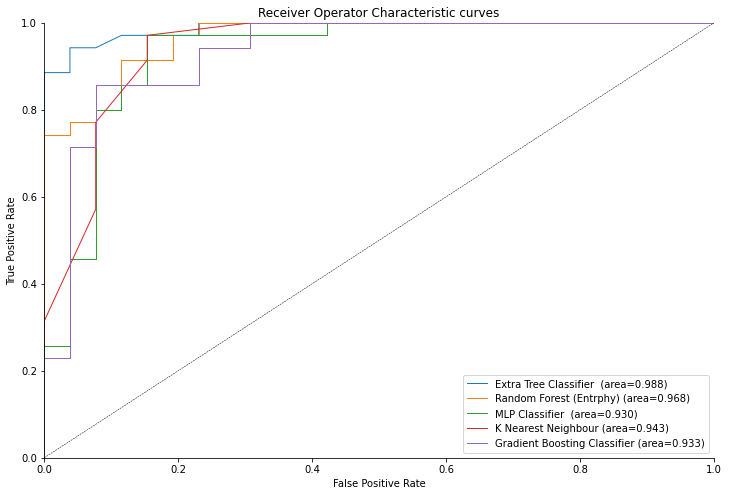

In [141]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,etc_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test,rfc_ent.predict_proba(X_test),label='Random Forest (Entrphy)',l='-')
roc_auc_plot(y_test,mlp.predict_proba(X_test),label='MLP Classifier ',l='-')
roc_auc_plot(y_test,knn9.predict_proba(X_test),label='K Nearest Neighbour',l='-')
roc_auc_plot(y_test,gbc.predict_proba(X_test),label='Gradient Boosting Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall Curve of Top Performing Models - Combined

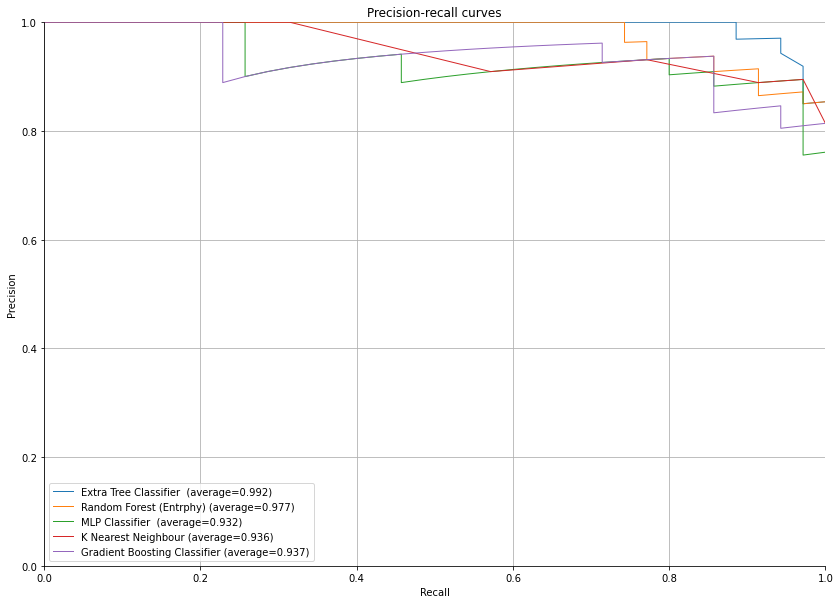

In [142]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test,etc_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,rfc_ent.predict_proba(X_test),label='Random Forest (Entrphy)',l='-')
precision_recall_plot(y_test,mlp.predict_proba(X_test),label='MLP Classifier ',l='-')
precision_recall_plot(y_test,knn9.predict_proba(X_test),label='K Nearest Neighbour',l='-')
precision_recall_plot(y_test,gbc.predict_proba(X_test),label='Gradient Boosting Classifier',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Importance

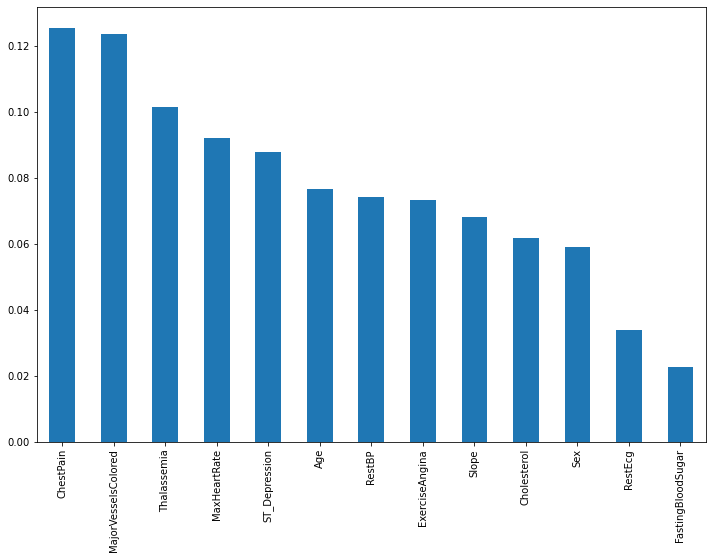

In [143]:
feat_importances = pd.Series(etc_100.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar',figsize=(12,8))
plt.show()

# Conclusion:
    
    
We see that again ensemble of power machine learning algorithms resulted in higher performance .

The top 5 most contribution features are:

i) Chestpain, ii) MajorVesselsColored, iii) Thalassemia, iv) MaxHeartRate and v) ST_Depression
